In [1]:
options(repr.plot.width=13, repr.plot.height=8)

install.packages('RCurl')
install.packages('zoo')
suppressPackageStartupMessages({
    require(repr) # Enables resizing of the plots.
    require(RCurl)
    require(foreign)
    require(tidyverse) # To tip the df from long row of dates to cols (pivot_longer())
    require(zoo) # Rolling average
})

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Extracting the number of confirmed cummulative cases by country from the Johns Hopkins website:
 
x = getURL("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
corona <- read.csv(textConnection(x))

corona = (read_csv(x)
          %>% pivot_longer(cols = -c(`Province/State`, `Country/Region`, Lat, Long),
                           names_to = "date",
                           values_to = "cases")
          %>% select(`Province/State`,`Country/Region`, date, cases)
          %>% mutate(date=as.Date(date,format="%m/%d/%y"))
          %>% drop_na(cases)
          %>% rename(country="Country/Region", provinces="Province/State")
)
 
cc <- (corona
       %>% filter(country %in% c("Italy", "Spain","US", "Norway", "Denmark", "Sweden","Korea, South", "Brazil","India"))
)
 
ccw <- (cc
        %>% pivot_wider(names_from="country",values_from="cases")
        %>% filter(Italy>5)
)

In [3]:
# Extracting the number of confirmed cummulative cases in China from the Johns Hopkins website:
 
china <- corona[corona$country=='China',]
provinces <- c('Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui',
               'Jiangxi','Shandong','Jiangsu','Sichuan','Heilongjiang','Hebei',
               'Fujian','Guangxi','Shaanxi','Yunnan','Hainan','Guizhou','Shanxi',
               'Gansu','Hong Kong','Liaoning','Jilin','Xinjiang','Inner Mongolia',
               'Ningxia','Qinghai','Macau','Tibet')
 
china_prov <- china[is.element(china$provinces,provinces),]
ccchina <- china_prov[,2:4]
temp <- aggregate(ccchina[ ,3], FUN="sum", by=list(as.Date(ccchina$date)))
ccchina[1:nrow(temp),2:3] <- temp 
ccchina <- ccchina[1:nrow(temp),]
 
ccw_china <- (ccchina
              %>% pivot_wider(names_from=country,values_from="cases")
              %>% filter(China>1)
)

In [4]:
# Extracting number of cummulative deaths by country from the Johns Hopkins website:
 
y = getURL("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
corona_death <- read.csv(textConnection(y))
 
corona_death = (read_csv(y)
                %>% pivot_longer(cols = -c(`Province/State`, `Country/Region`, Lat, Long),
                                 names_to = "date",
                                 values_to = "cases")
                %>% select(`Province/State`, `Country/Region`, date, cases)
                %>% mutate(date=as.Date(date,format="%m/%d/%y"))
                %>% drop_na(cases)
                %>% rename(country="Country/Region")
                %>% rename(state="Province/State")
)
 
ccd <- (corona_death
        %>% filter(country %in% c("Italy", "Spain","US", "Norway", "Denmark", "Sweden", "Brazil", "Korea, South"))
)
 
ccwd <- (ccd
         %>% pivot_wider(names_from="country",values_from="cases")
         %>% filter(Italy>1)
)

In [5]:
# Extracting the number of cummulative deaths in China from the Johns Hopkins website:
 
china <- corona_death[corona_death$country=='China',]
provinces <- c('Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui',
               'Jiangxi','Shandong','Jiangsu','Sichuan','Heilongjiang','Hebei',
               'Fujian','Guangxi','Shaanxi','Yunnan','Hainan','Guizhou','Shanxi',
               'Gansu','Hong Kong','Liaoning','Jilin','Xinjiang','Inner Mongolia',
               'Ningxia','Qinghai','Macau','Tibet')
china_prov <- china[is.element(china$state,provinces),]
ccchina <- china_prov[,2:4]
temp <- aggregate(ccchina[ ,3], FUN="sum", by=list(as.Date(ccchina$date)))
 
ccchina[1:nrow(temp),2:3] <- temp 
ccchina <- ccchina[1:nrow(temp),]

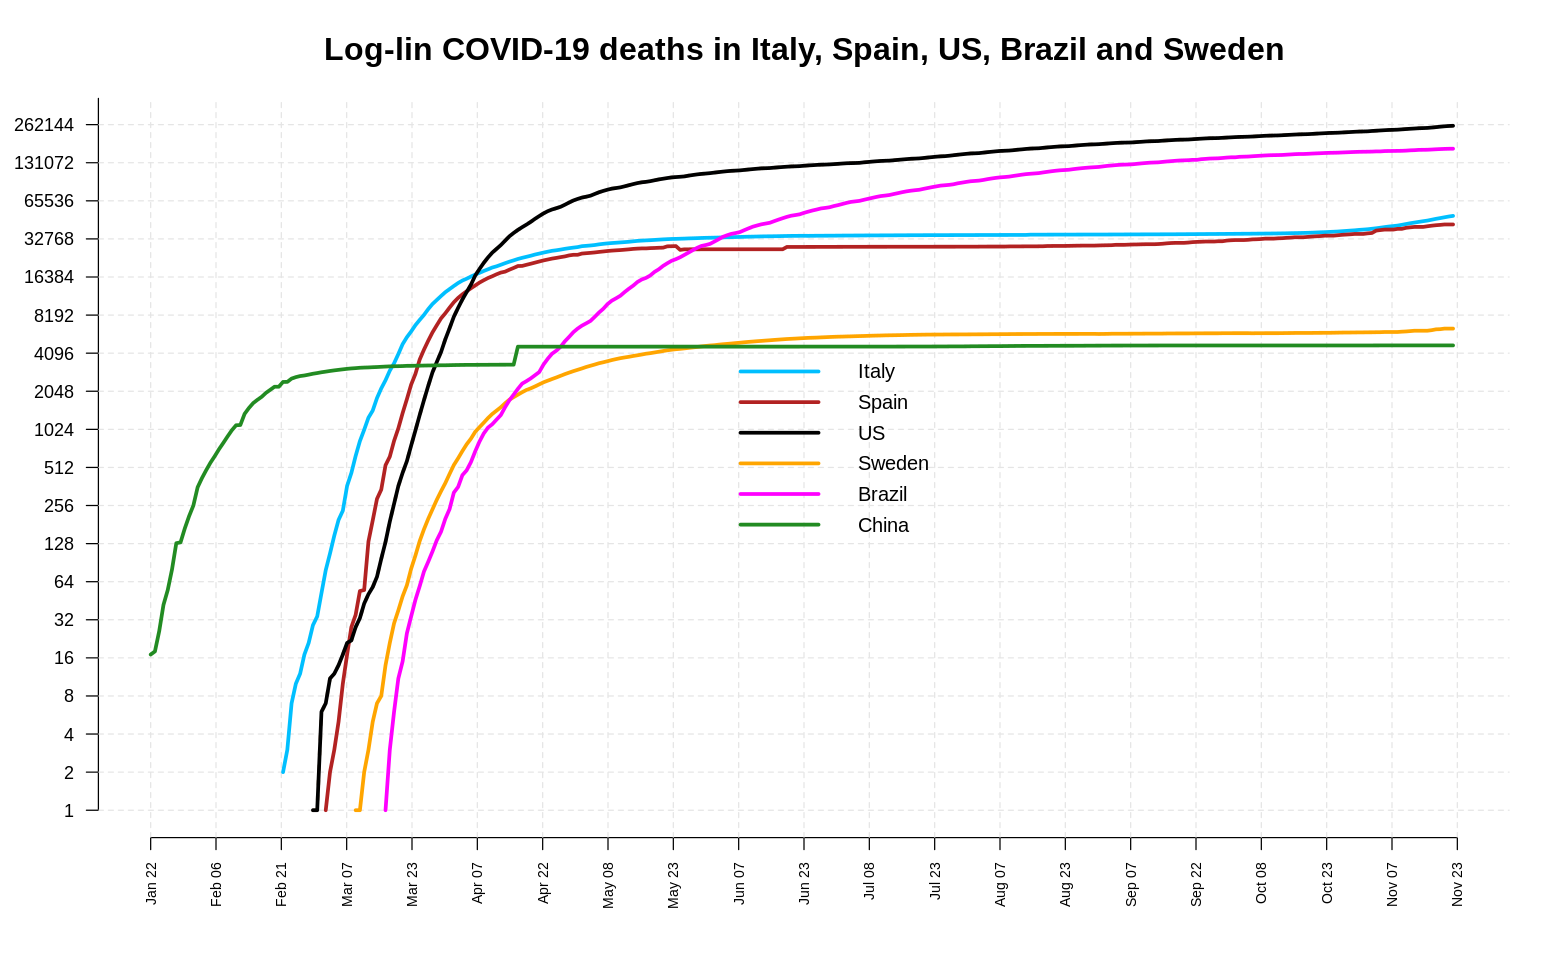

In [6]:
# Log-linear plot of cummulative deaths by country with the number of cases in Italy for comparison:
options(warn = -1)
plot(ccwd$date, ccwd$US, type="l", lwd=3, lty=3,
     ylab='', 
     xlab='',
     log='y',
     xlim=c(min(ccchina$date), max(ccwd$date)+1),
     main ='Log-lin COVID-19 deaths in Italy, Spain, US, Brazil and Sweden',
     col="bisque3",
     axes=FALSE,
     cex.main=1.6)
 

at1 <- seq(min(ccchina$date), max(ccwd$date)+1, by=0.05*length(ccchina$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

at2 <- 2^seq(0,30, by=1)
axis(side=2, at2, cex.axis=0.9, las=1)
 

abline(h=at2, lty=2, col="grey90")  # Add faint grid lines
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
 
 
lines(ccwd$date, ccwd$Italy, type="l", lwd=3, lty=1, col="deepskyblue")
lines(ccwd$date, ccwd$Spain, lwd=3, col="firebrick")
lines(ccwd$date, ccwd$US, lwd=3)
lines(ccwd$date, ccwd$Sweden, type="l", lwd=3, lty=1, col="orange")
lines(ccwd$date, ccwd$Brazil, type="l", lwd=3, lty=1, col="magenta")
lines(ccchina$date, ccchina$cases, type="l", lwd=3, lty=1, col="forestgreen")
 
legend(ccw$date[100], .8*max(ccwd$Sweden), bg="transparent",
       legend=c("Italy", 
                "Spain", "US", "Sweden", "Brazil", "China"),
       col=c("deepskyblue", "firebrick", 1,"orange", "magenta", "forestgreen"), lty=1, , lwd=3, cex=1,
       box.lty=0)


[1] "The total number of deaths in the US is 256,782 ."

[1] "The fatality rate in the US is 2.1 percent."

[1] "The total number of deaths in the SK is 509 ."

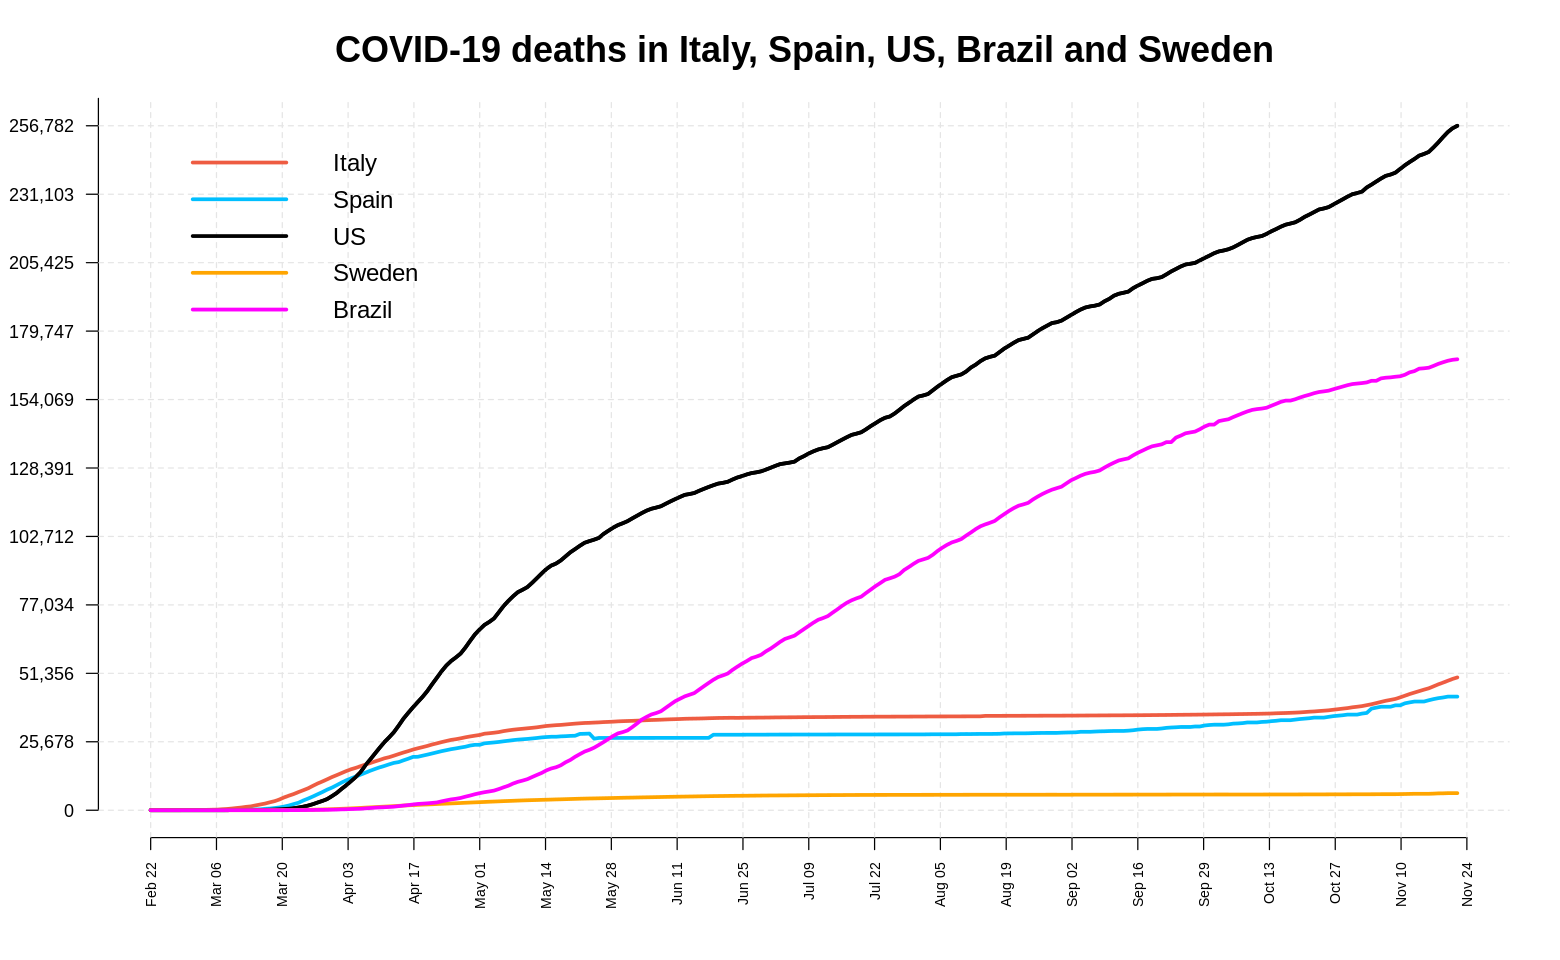

In [7]:
# Plot of the cummulative number of deaths per country:
 
plot(ccwd$date, ccwd$US, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     main ='COVID-19 deaths in Italy, Spain, US, Brazil and Sweden',
     axes=FALSE,
     cex.main=1.8)
 
at1 <- seq(min(ccwd$date), max(ccwd$date)+5, by=0.05*length(ccw$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
 
 
at2 <- seq(0,max(ccwd$US)+.1*max(ccwd$US),by=.1*max(ccwd$US))
axis(side=2, at2, labels = formatC(at2, big.mark = ",", format = "d"), cex.axis=0.9, las=1)
 
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines

abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
 
lines(ccwd$date, ccwd$Italy, lwd=3, col="tomato2")
lines(ccwd$date, ccwd$Spain, lwd=3, col="deepskyblue1")
lines(ccwd$date, ccwd$US, lwd=3)
lines(ccwd$date, ccwd$Sweden, lwd=3, col='orange')
lines(ccwd$date, ccwd$Brazil, lwd=3, col='magenta')
 
legend(ccw$date[1], max(ccwd$US), bg="transparent",
       legend=c("Italy", "Spain", "US", "Sweden","Brazil"),
       col=c("tomato2", "deepskyblue1", 1, 'orange','magenta'), lty=c(1,1,1,1,1), lwd=3, cex=1.2,
       box.lty=0)

paste("The total number of deaths in the US is", format(tail(ccwd$US,1),format="d",big.mark=","),".")
paste("The fatality rate in the US is", round(tail(ccwd$US,1) / tail(ccw$US,1) * 100,1),"percent.")
paste("The total number of deaths in the SK is", format(tail(ccwd$`Korea, South`,1),format="d",big.mark=","),".")

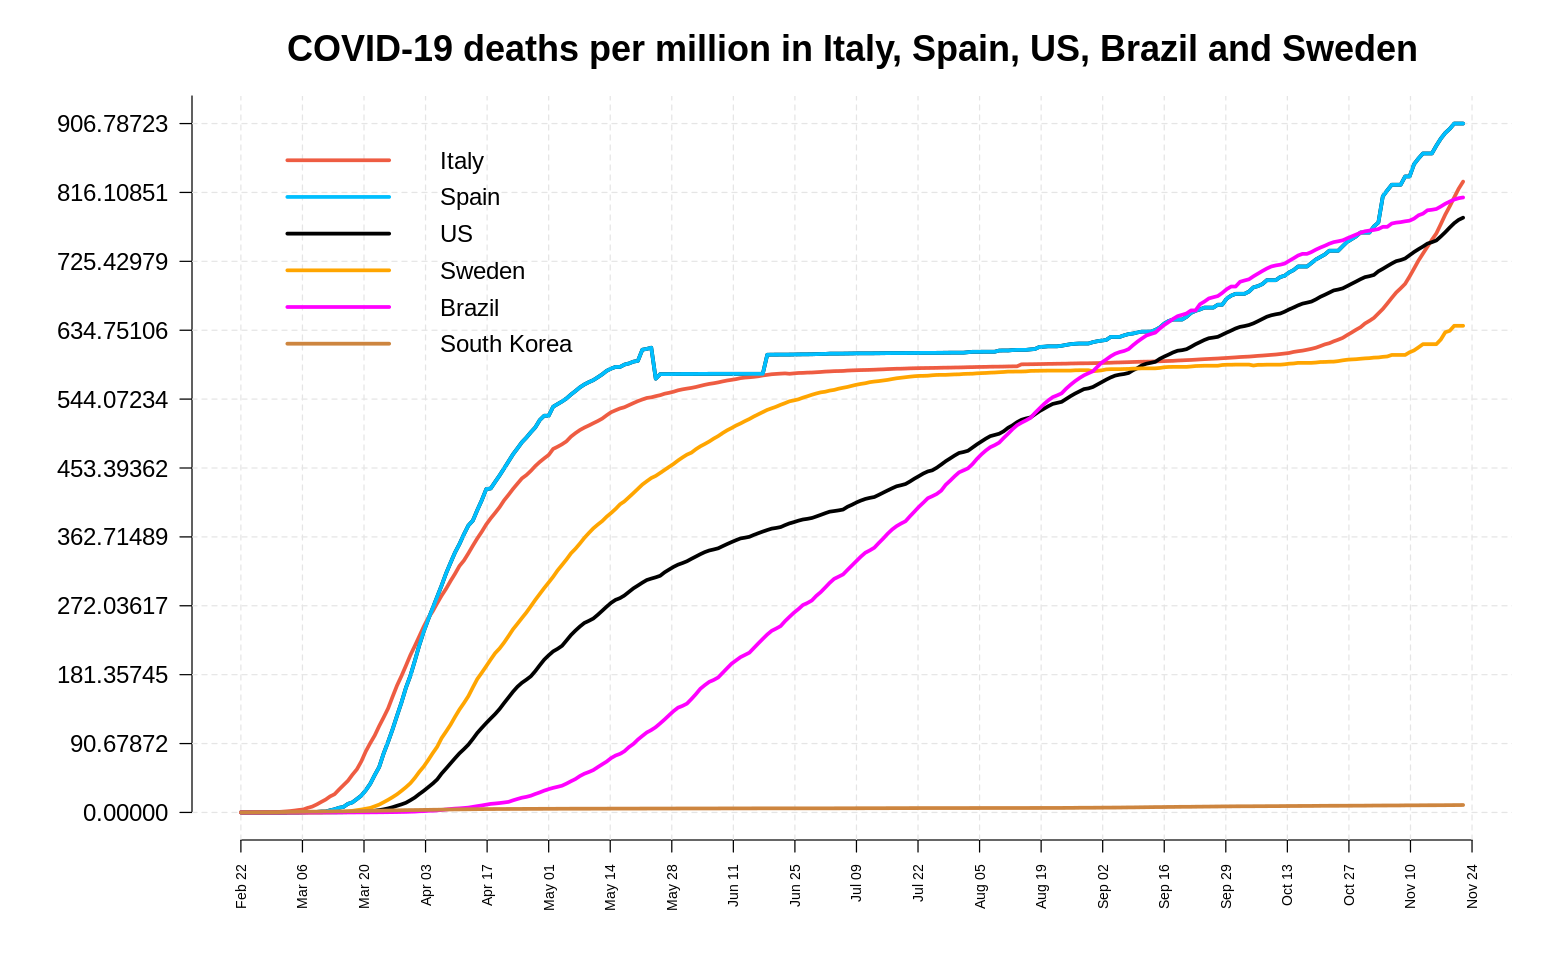

In [8]:
# Plot of the cummulative number of deaths per million per country (per 100,000):

popUS     <- 328
popItaly  <- 60
popSpain  <- 47
popBrazil <- 209
popSweden <- 10
popSK     <- 52
popChina  <- 1393
popIndia  <- 1353
popSK     <- 52

par(mar=c(5,8,4,2))
plot(ccwd$date, ccwd$Spain/popSpain, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     main ='COVID-19 deaths per million in Italy, Spain, US, Brazil and Sweden',
     axes=FALSE,
     cex.main=1.8)
 
at1 <- seq(min(ccwd$date), max(ccwd$date)+5, by=0.05*length(ccw$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
 
at2 <- seq(0,max(ccwd$Spain/popSpain)+.1*max(ccwd$Spain/popSpain),by=.1*max(ccwd$Spain/popSpain))
axis(side=2, at2, cex.axis=1.2, las=1)
 
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
 
lines(ccwd$date, ccwd$Italy/popItaly, lwd=3, col="tomato2")
lines(ccwd$date, ccwd$Spain/popSpain, lwd=3, col="deepskyblue1")
lines(ccwd$date, ccwd$US/popUS, lwd=3)
lines(ccwd$date, ccwd$Sweden/popSweden, lwd=3, col='orange')
lines(ccwd$date, ccwd$Brazil/popBrazil, lwd=3, col='magenta')
lines(ccwd$date, ccwd$`Korea, South`/popSK, lwd=3, col='tan3')

legend(ccw$date[1], max(ccwd$Spain/popSpain), bg="transparent",
       legend=c("Italy", "Spain", "US", "Sweden","Brazil","South Korea"),
       col=c("tomato2", "deepskyblue1", 1, 'orange','magenta','tan3'), lwd=3, cex=1.2,
       box.lty=0)

[1] "The number of deaths per million in Spain is  907 ."

[1] "The number of deaths per million in the US is  783 ."

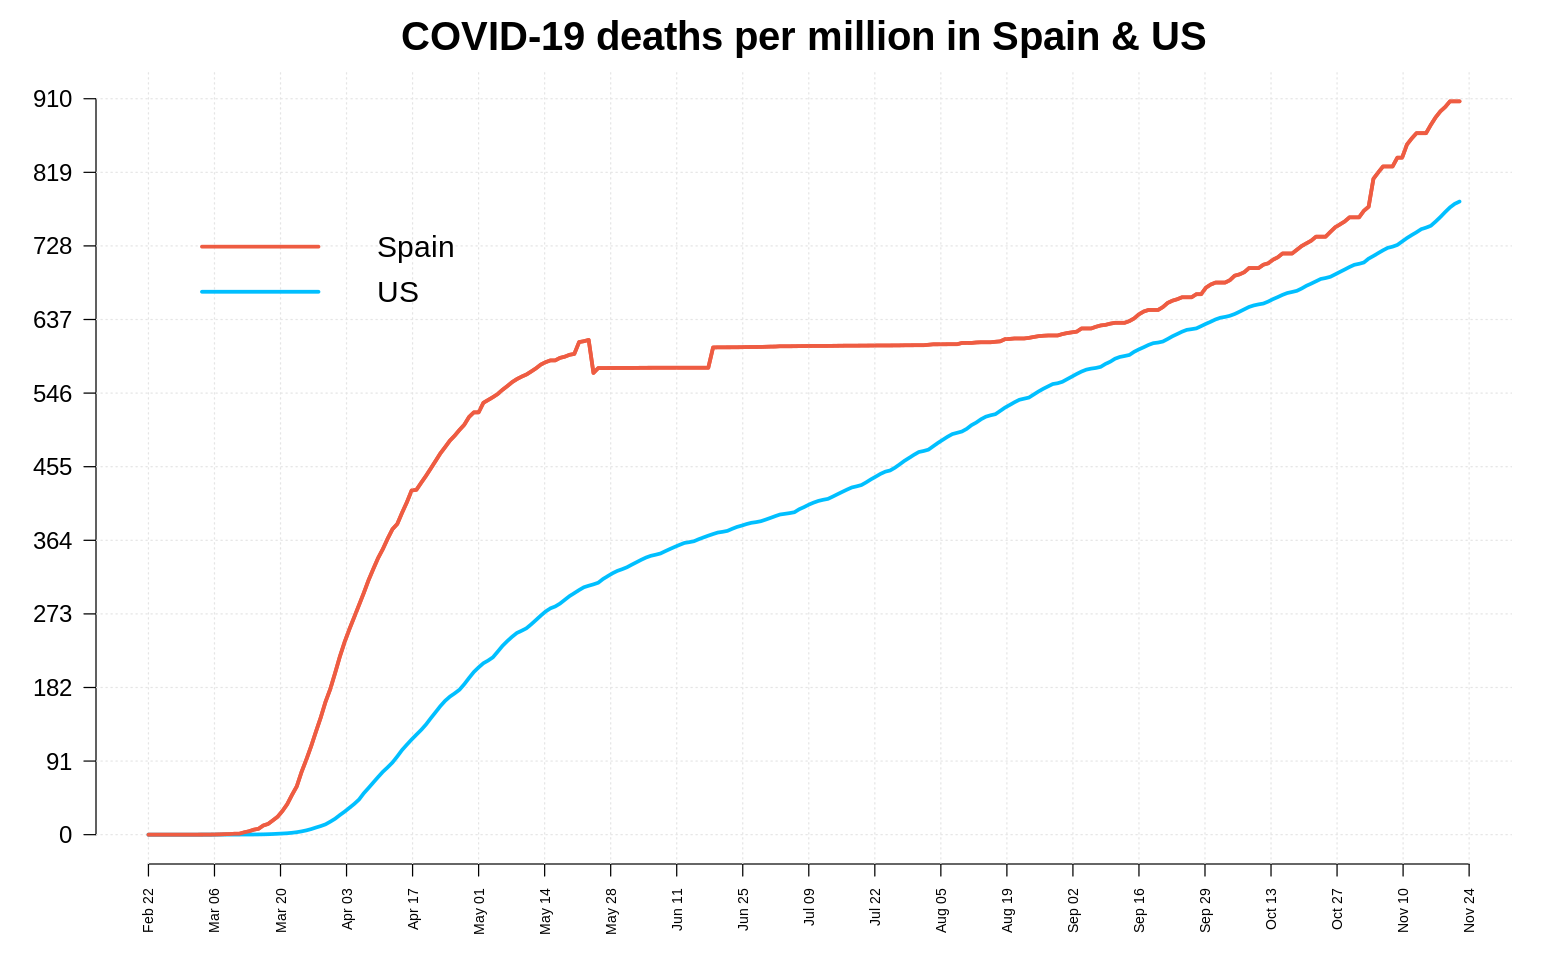

In [9]:
par(mar=c(4,4,3,2))
plot(ccwd$date, ccwd$Spain/popSpain, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     main ='COVID-19 deaths per million in Spain & US',
     col="tomato2",
     axes=FALSE,
     cex.main=2)
 
at1 <- seq(min(ccwd$date), max(ccwd$date)+5, by=0.05*length(ccw$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
 
at2 <- seq(0,max(ccwd$Spain/popSpain)+.1*max(ccwd$Spain/popSpain),by=round(.1*max(ccwd$Spain/popSpain)))
axis(side=2, at2, cex.axis=1.2, las=1)
 
abline(h=at2, lty=3, col="grey90")  # Add faint grid lines
abline(v=at1, lty=3, col="grey90")  # Add faint grid lines
 
lines(ccwd$date, ccwd$US/popUS, lwd=3, col="deepskyblue1")
lines(ccwd$date, ccwd$Spain/popSpain, lwd=3, col="tomato2")

legend(ccw$date[1], max(ccwd$US/popUS), bg="transparent",
       legend=c("Spain", "US"),
       col=c("tomato2", "deepskyblue1"), lwd=3, cex=1.5,
       box.lty=0)

paste("The number of deaths per million in Spain is ", round(max(ccwd$Spain/popSpain)),".")
paste("The number of deaths per million in the US is ", round(max(ccwd$US/popUS)),".")

[1] "The number of deaths in the last day in the US is 921 ."

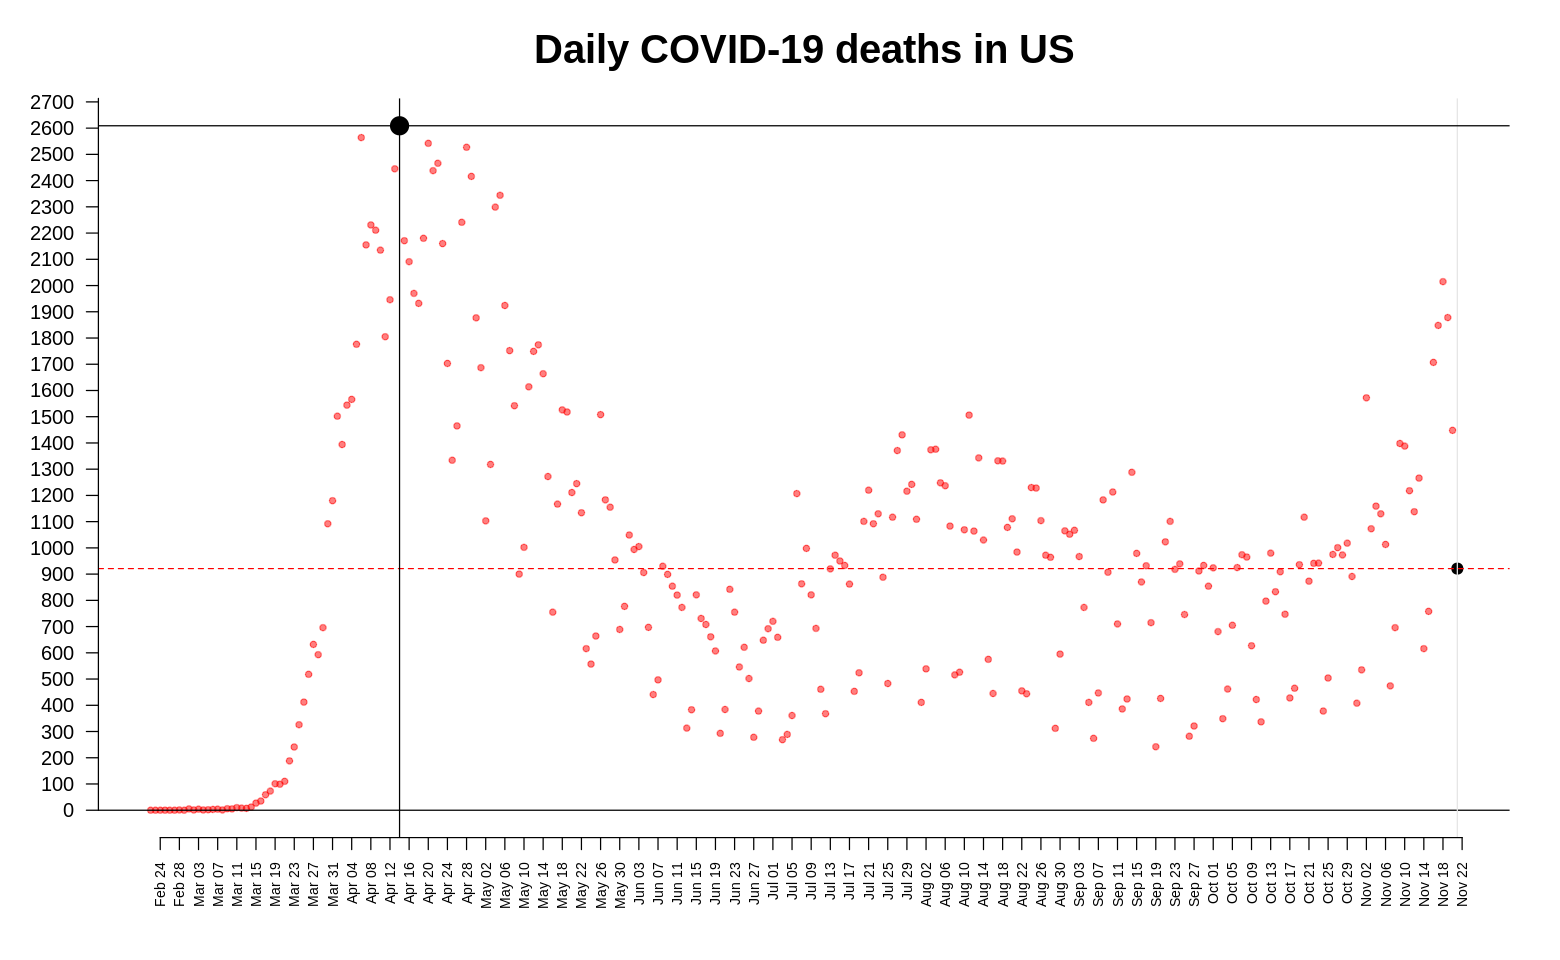

In [10]:
f.der<-diff(ccwd$US, lag = 1, differences = 1)

plot(ccwd$date[2:length(ccwd$date)-1], f.der, 
     pch = 19, cex = 0.7,
     ylab='', 
     xlab='',
     main ='Daily COVID-19 deaths in US',
     col=alpha("red",.5),
     axes=FALSE,
     cex.main=2)

points(ccwd$date[length(ccwd$date)-1], last(f.der), cex=1.2, pch=19)

abline(h=0)
abline(v=ccwd$date[length(ccwd$date)-1], col='gray90')
abline(h=f.der[length(ccwd$date)-1], col='red', lty=2)

at1 <- seq(min(ccwd$date)+2, max(ccwd$date), by=4)
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

axis(side=2, seq(min(f.der),max(f.der)+500, 100), 
     las=2, cex.axis=1)

abline(h=max(f.der))
abline(v=ccwd$date[which.max(f.der)])
points(ccwd$date[which.max(f.der)], f.der[which.max(f.der)], pch=19, cex=2)

paste("The number of deaths in the last day in the US is", format(tail(f.der,1),format="d",big.mark=","), ".")

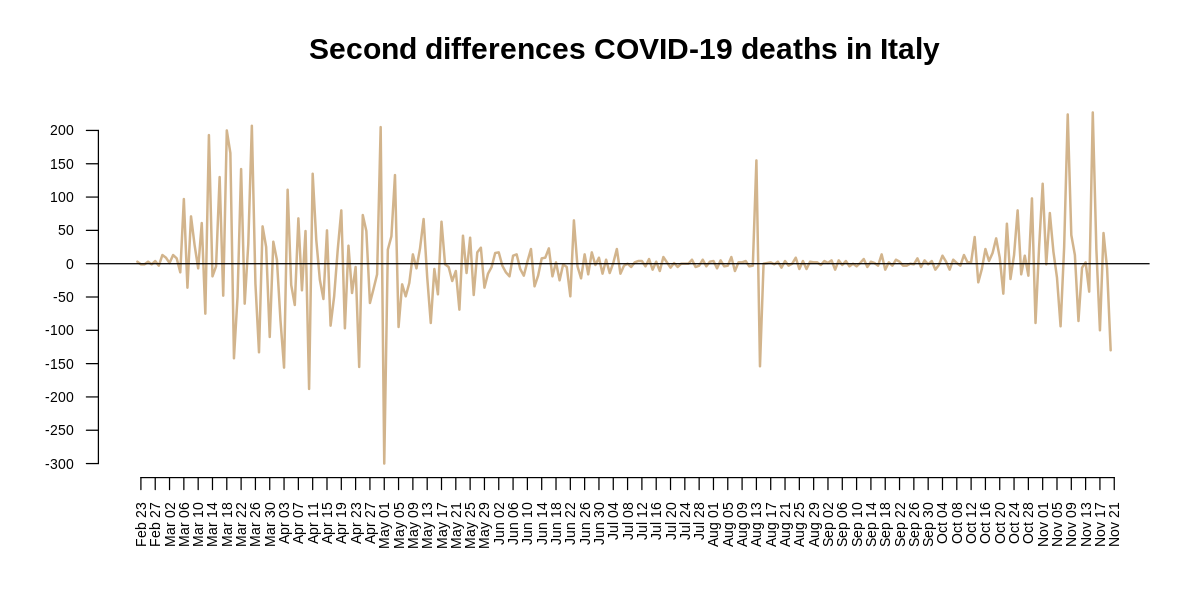

In [11]:
# Analyzing second differences in the number of deaths in Italy:

options(repr.plot.width=10, repr.plot.height=5)


first.der<-diff(ccwd$Italy, lag = 1, differences = 1)
sec.der <- diff(ccwd$Italy, lag = 1, differences = 2)

plot(ccwd$date[2:length(ccwd$date)-2], sec.der, 
     type="l", lwd=2, lty=1,
     ylab='', 
     xlab='',
     main ='Second differences COVID-19 deaths in Italy',
     col="tan",
     axes=FALSE,
     cex.main=1.5)
abline(h=0)
at1 <- seq(min(ccw$date)+2, max(ccw$date), by=4);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
axis(side=2, seq(min(sec.der),max(sec.der),50), 
     las=2, cex.axis=0.7)

#require(tseries)
#require(forecast)
#require(astsa)
#dif<-diff(ccwdpred$Italy)
#fit = auto.arima(dif)
#pred = predict(fit, n.ahead = 50)
#ts.plot(dif, pred$pred, lty = c(1,3), col=c(5,2))
#gtemp_pred<-gtemp[length(gtemp)]
#for(i in 1:length(pred$pred)){
#  gtemp_pred[i+1]<-gtemp_pred[i]+pred$pred[i]
#}
#plot(c(gtemp,gtemp_pred),type="l")

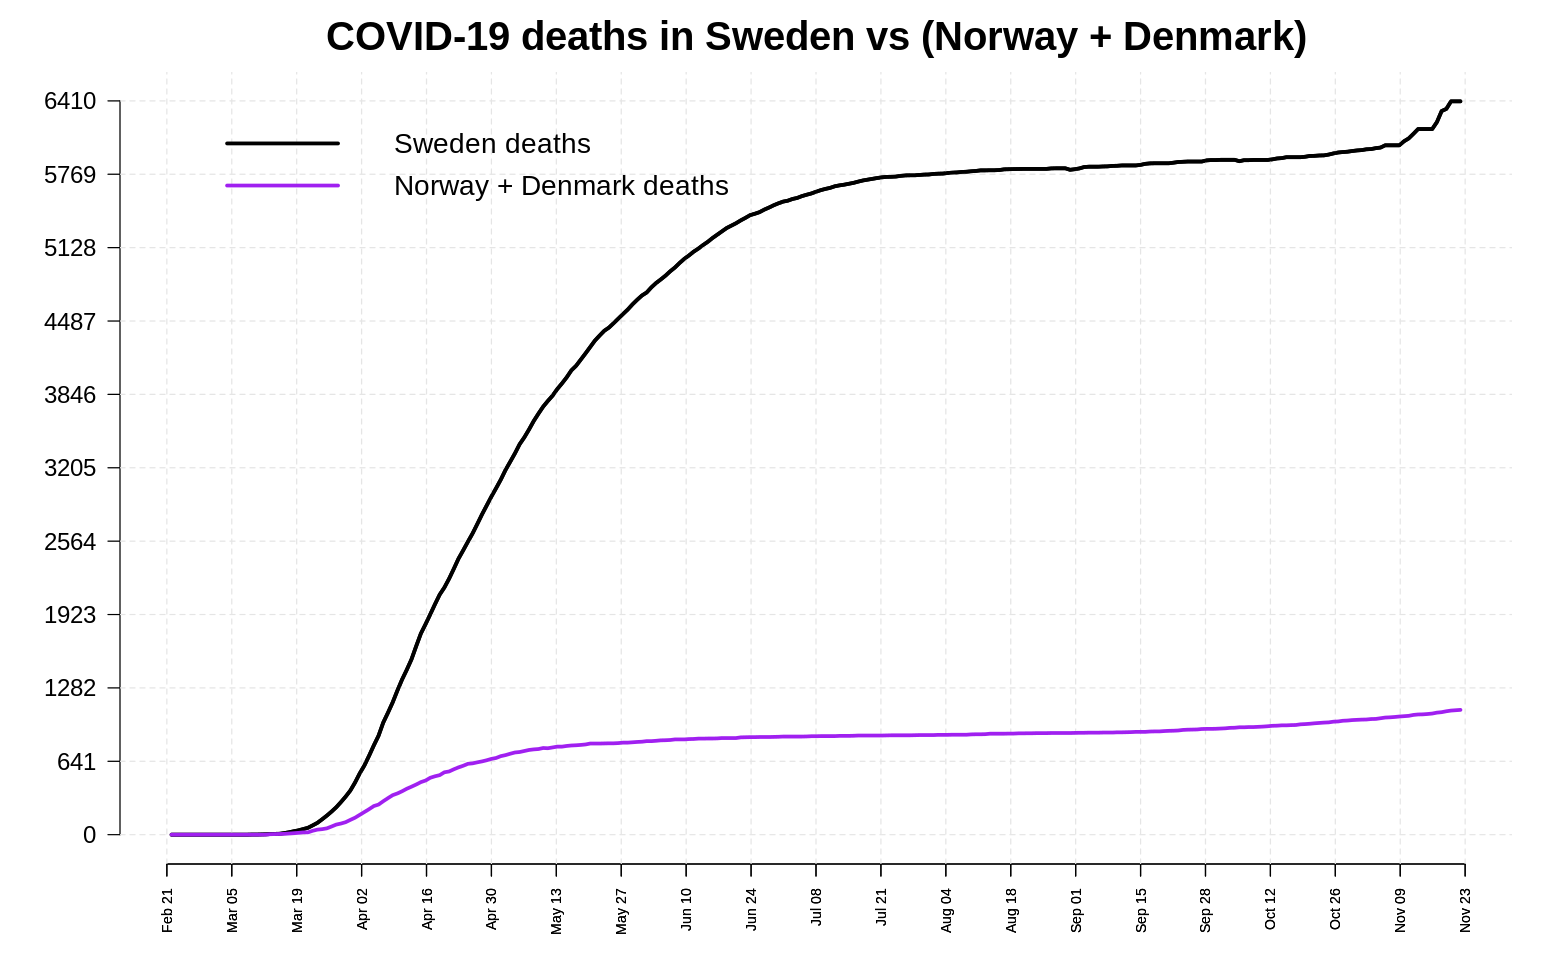

In [12]:
# Cummulative number of deaths in Sweden compared to Norway + DenmarK:

options(repr.plot.width=13, repr.plot.height=8)
par(mar=c(4,5,3,2))
plot(ccwd$date, ccwd$Sweden, 
      type="l", lwd=3, lty=1,
      ylab='', 
      xlab='',
      main ='COVID-19 deaths in Sweden vs (Norway + Denmark)',
      axes=FALSE,
      cex.main=2)


at1 <- seq(min(ccw$date), max(ccw$date)+5, by=0.05*length(ccw$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
 
at2 <- seq(0,max(ccwd$Sweden)+.1*max(ccwd$Sweden),by=round(.1*max(ccwd$Sweden)))
axis(side=2, at2, cex.axis=1.2, las=1)

axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)


abline(h=at2, lty=2, col="grey90")  # Add faint grid lines

abline(v=at1, lty=2, col="grey90")  # Add faint grid lines

lines(ccwd$date, ccwd$Sweden, lwd=3, col=1)
lines(ccwd$date, ccwd$Norway + ccwd$Denmark, lwd=3, col='purple')

legend(ccwd$date[1], max(ccwd$Sweden), bg="transparent",
       legend=c("Sweden deaths", "Norway + Denmark deaths"),
       col=c(1, 'purple'), lty=c(1,1), lwd=3, cex=1.4,
       box.lty=0)


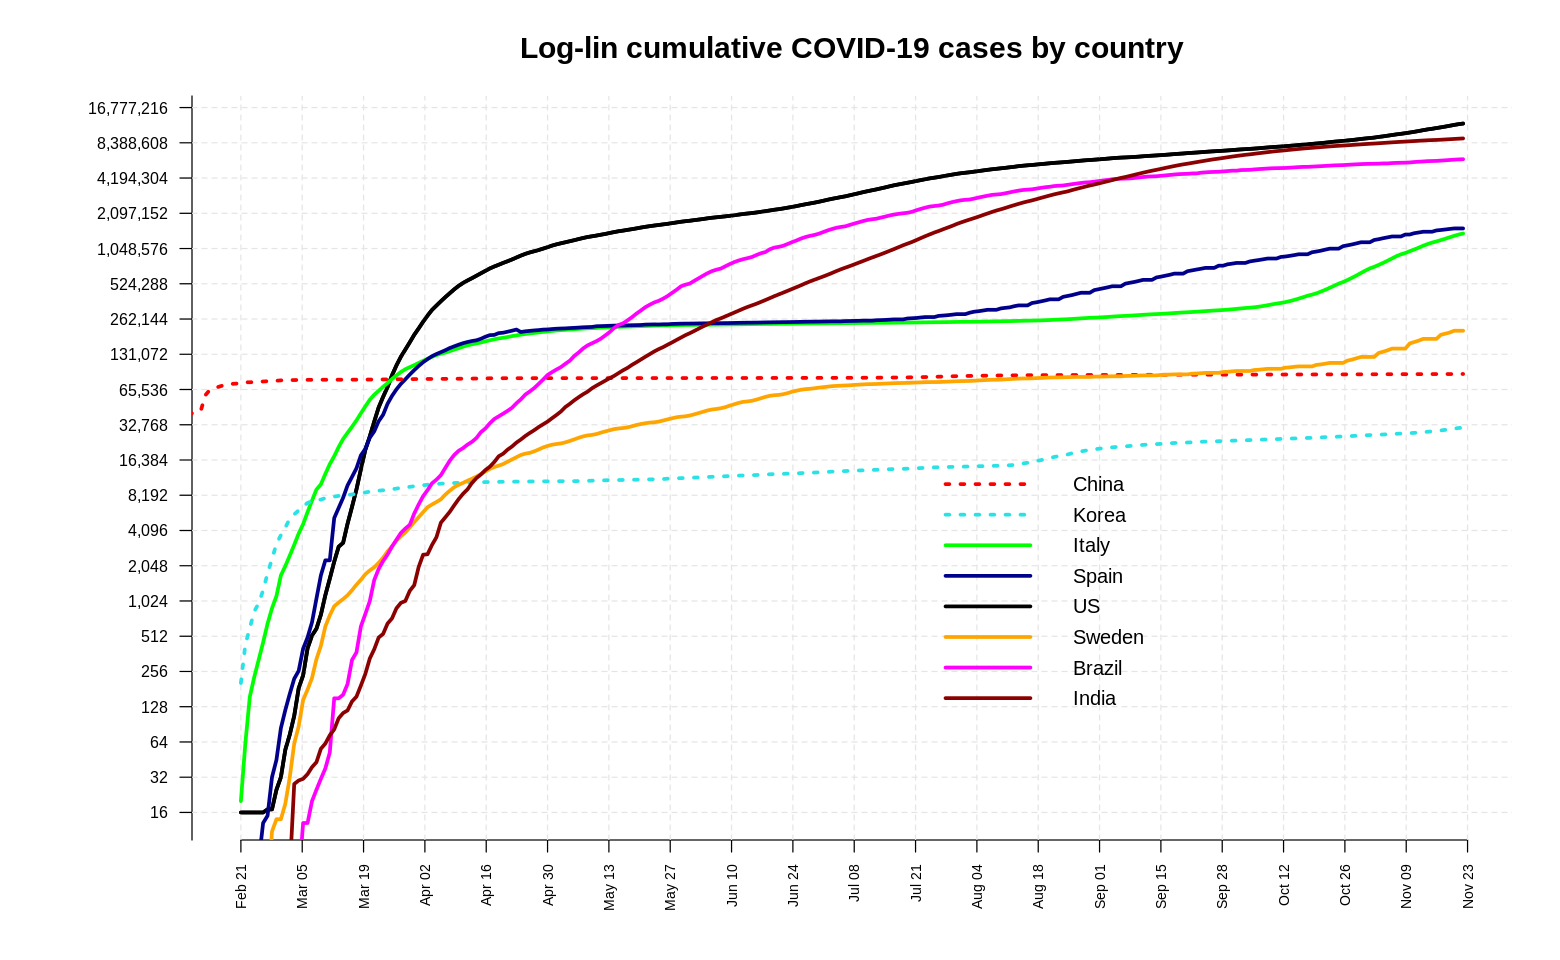

In [13]:
# Log-lin plot of cummulative number of cases by country:
par(mar=c(5,8,4,2))
plot(ccw$date, ccw$US, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     log='y',
     col=1,
     axes=FALSE,
     main = "Log-lin cumulative COVID-19 cases by country",
     cex.main=1.5)


at1 <- seq(min(ccw$date), max(ccw$date)+5, by=0.05*length(ccw$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)


at2 <- 2^seq(1,1.1 * log2(max(ccw$US)),by=round(.05 * log2(max(ccw$US))))
axis(side=2, at2, cex.axis=0.8, las=2, labels = formatC(at2, big.mark = ",", format = "d"))

abline(h=at2, lty=2, col="grey90")  # Add faint grid lines
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines


lines(ccw$date, ccw$US, type="l", lwd=3, col=1)
lines(ccw$date, ccw$Italy, type="l", lwd=3, col="green")
lines(ccw$date, ccw$`Korea, South`, lwd=3, col=5, lty=3)
lines(ccw$date, ccw$Spain, lwd=3, col="blue4")
lines(ccw_china$date, ccw_china$China, lwd=3, lty= 3, col='red')
lines(ccw$date, ccw$Sweden, lwd=3, col="orange")
lines(ccw$date, ccw$Brazil, lwd=3, col="magenta")
lines(ccw$date, ccw$India, lwd=3, col="darkred")

legend(ccw$date[150], .6*max(ccw$`Korea, South`), bg="transparent",
       legend=c("China", "Korea", "Italy", "Spain", "US", "Sweden","Brazil","India"),
       col=c("red",5,"green","blue4",1,"orange","magenta","darkred"), lty=c(3,3,1,1,1,1,1,1), lwd=3, cex=1,
       box.lty=0)

[1] "Total cases in the USA:  12,246,849 out of 328,000,000 or  3.73  percent."

[1] "Total cases in the India:  9,139,865 out of 1,353,000,000 or  0.68  percent."

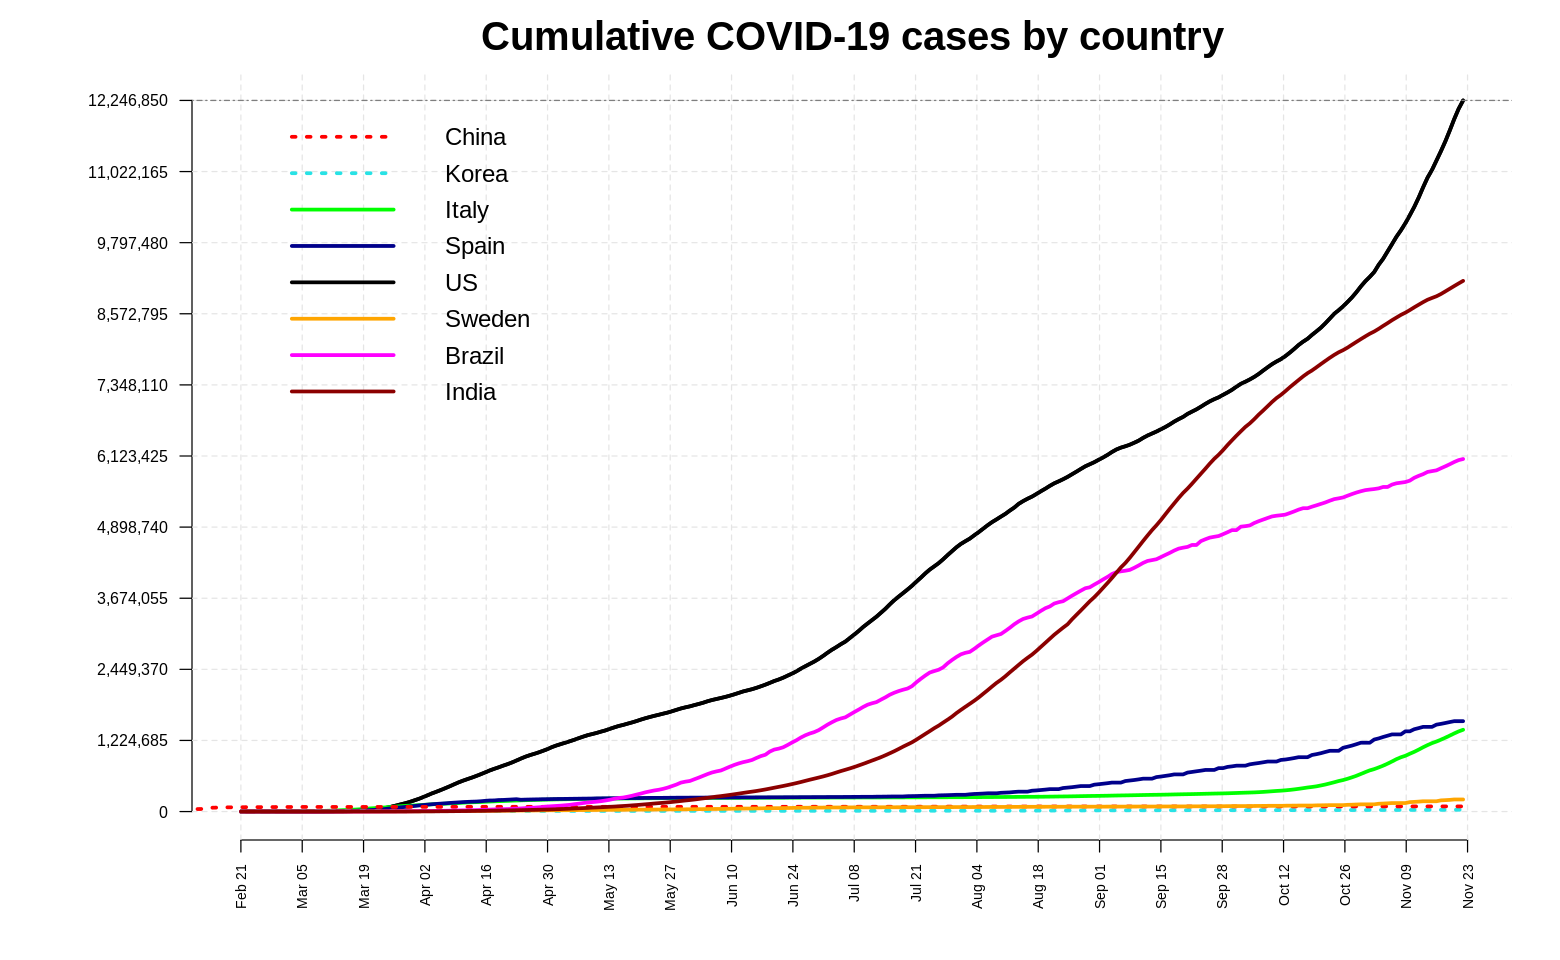

In [14]:
# Cummulative number of cases by country:
par(mar=c(5,8,3,2))
plot(ccw$date, ccw$US, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     col=1,
     axes=F,
     cex.axis=1,
     las=2,
     main = "Cumulative COVID-19 cases by country",
     cex.main=2,
     bty='l')


at1 <- seq(min(ccw$date), max(ccw$date)+5, by=0.05*length(ccw$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

at2 <- seq(0, 1.1 * max(ccw$US), by=round(.1 * max(ccw$US)))
axis(side=2, at2, cex.axis=0.8, las=2, labels = formatC(at2, big.mark = ",", format = "d"))

abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines

lines(ccw$date, ccw$US, lwd=3, col=1)
lines(ccw$date, ccw$Italy, lwd=3, col="green")
lines(ccw$date, ccw$Spain, lwd=3, col="blue4")
lines(ccw$date, ccw$`Korea, South`, lwd=3, lty=3, col=5)
lines(ccw_china$date, ccw_china$China, lwd=3, lty=3, col="red")
lines(ccw$date, ccw$Sweden, lwd=3, lty=1, col="orange")
lines(ccw$date, ccw$Brazil, lwd=3, lty=1, col="magenta")
lines(ccw$date, ccw$India, lwd=3, lty=1, col="darkred")

legend(ccw$date[1], max(ccw$US), bg="transparent",
       legend=c("China","Korea", "Italy", "Spain", "US", "Sweden","Brazil","India"),
       col=c("red",5,"green", "blue4", 1, "orange","magenta","darkred"), lty=c(3,3,1,1,1,1,1,1), lwd=3, cex=1.2,
       box.lty=0)

abline(h=tail(ccw$US,1), col="gray50", lty=4)

paste("Total cases in the USA: ", format(tail(ccw$US,1),format="d",big.mark=","), "out of 328,000,000 or ", 
        round(tail(ccw$US,1)*100/328000000,2), " percent.")
paste("Total cases in the India: ", format(tail(ccw$India,1),format="d",big.mark=","), "out of 1,353,000,000 or ", 
        round(tail(ccw$India,1)*100/1353000000,2), " percent.")

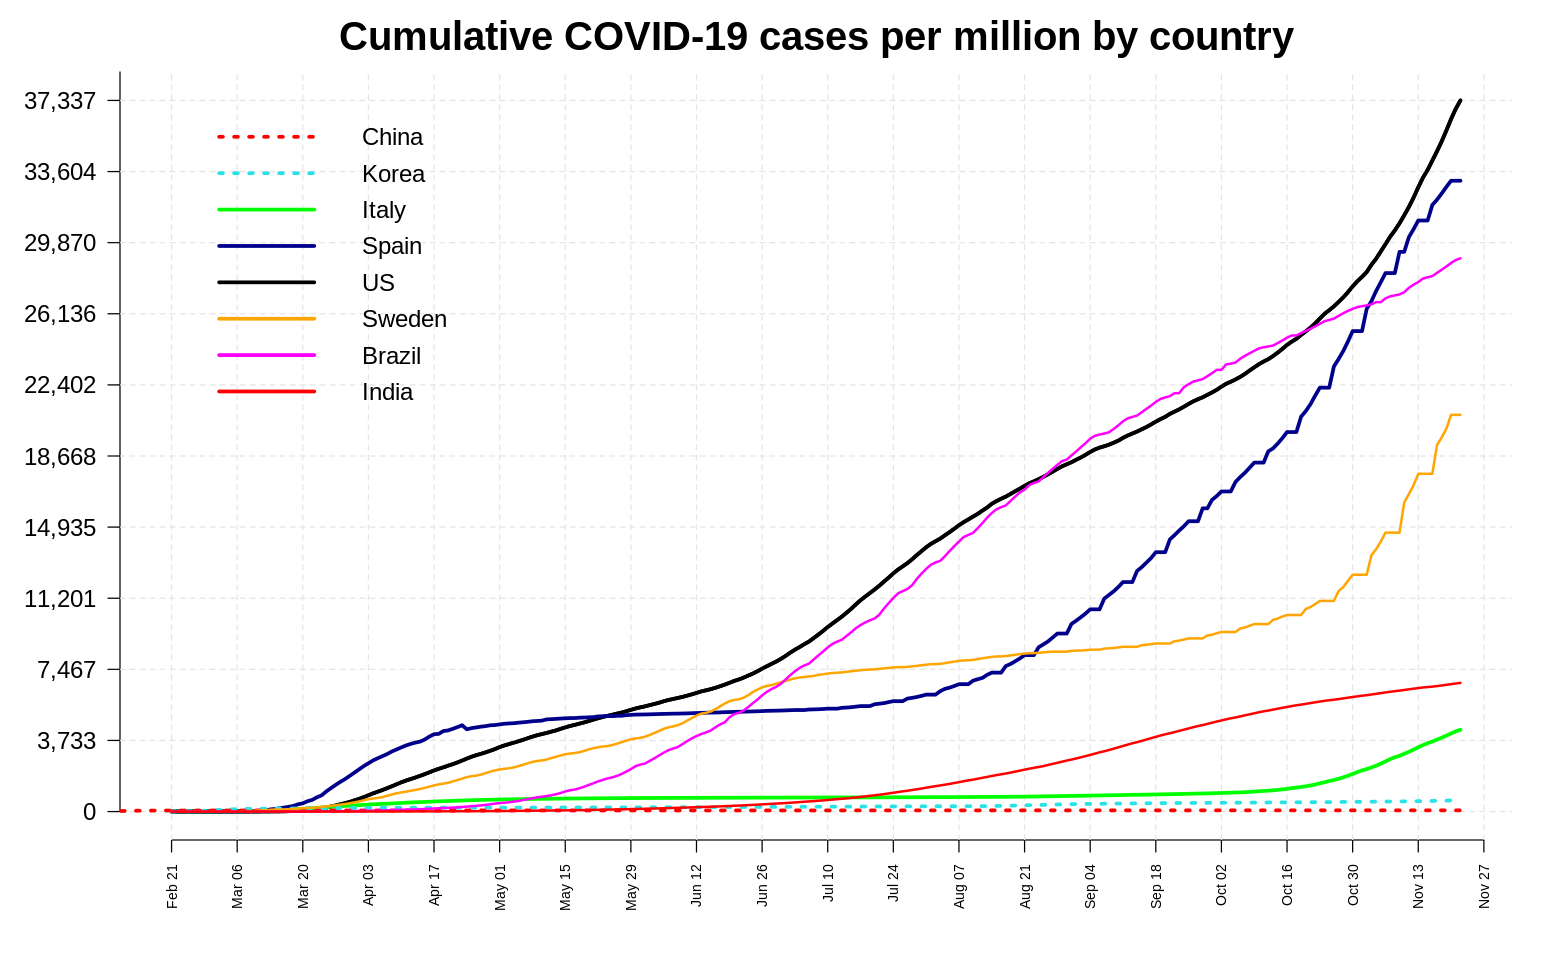

In [15]:
# Cummulative number of cases per million by country:
par(mar=c(5,5,3,2))
plot(ccw$date, ccw$US/popUS, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     col=1,
     axes=F,
     cex.axis=1,
     las=2,
     main = "Cumulative COVID-19 cases per million by country",
     cex.main=2,
     bty='l')

at1 <- seq(min(ccw$date), max(ccw$date)+5, by=round(0.05*length(ccw$date)))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

at2 <- seq(0, 100000, by=0.1*max(ccw$US/popUS));
axis(side=2, at2, cex.axis=1.2, las=2, labels = formatC(at2, big.mark = ",", format = "d"))

abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines

lines(ccw$date, ccw$US/popUS, lwd=3, col=1)
lines(ccw$date, ccw$Italy/popUS, lwd=3, col="green")
lines(ccw$date, ccw$Spain/popSpain, lwd=3, col="blue4")
lines(ccw$date, ccw$`Korea, South`/popSK, lwd=3, lty=3, col=5)
lines(ccw_china$date, ccw_china$China/popChina, lwd=3, lty=3, col="red")
lines(ccw$date, ccw$Sweden/popSweden, lwd=2, lty=1, col="orange")
lines(ccw$date, ccw$Brazil/popBrazil, lwd=2, lty=1, col="magenta")
lines(ccw$date, ccw$India/popIndia, lwd=2, lty=1, col="red")

legend(ccw$date[1], max(ccw$US/popUS), bg="transparent",
       legend=c("China","Korea", "Italy", "Spain", "US", "Sweden","Brazil","India"),
       col=c("red",5,"green", "blue4", 1, "orange","magenta","red"), lty=c(3,3,1,1,1,1,1,1), lwd=3, cex=1.2,
       box.lty=0)

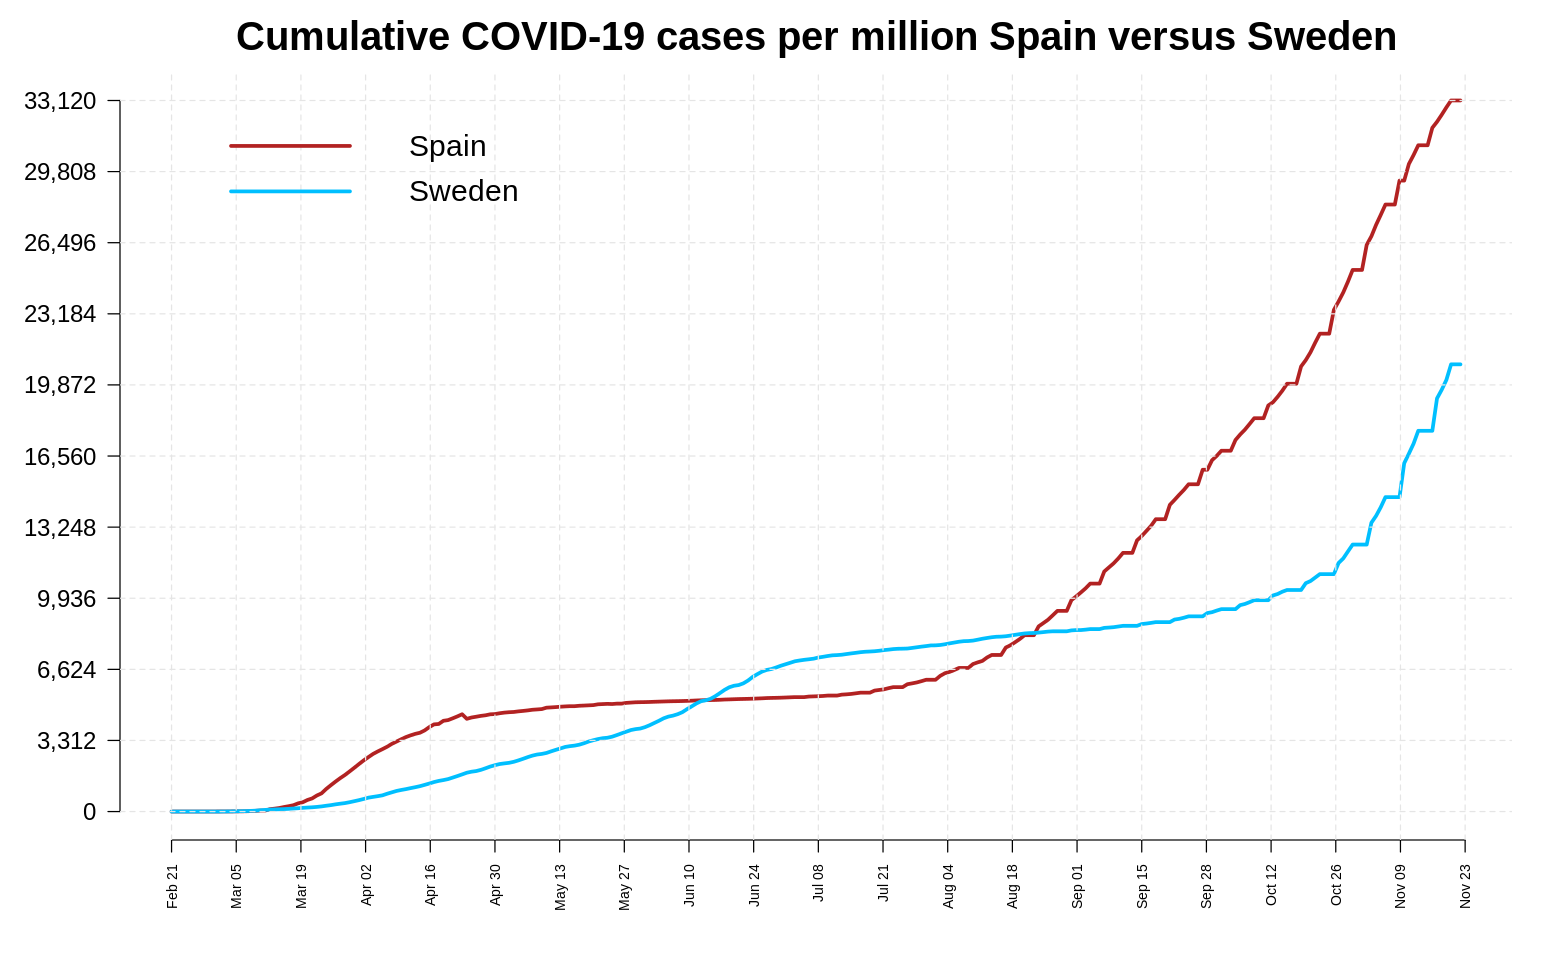

In [16]:
par(mar=c(5,5,3,2))
plot(ccw$date, ccw$Spain/popSpain, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     col="firebrick",
     axes=F,
     cex.axis=1,
     las=2,
     main = "Cumulative COVID-19 cases per million Spain versus Sweden",
     cex.main=2,
     bty='l')
 
at1 <- seq(min(ccw$date), max(ccw$date)+5, by=0.05*length(ccw$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
 
at2 <- seq(0, max(ccw$Spain/popSpain), by=round(.1 * max(ccw$Spain/popSpain)))
axis(side=2, at2, cex.axis=1.2, las=2, labels = formatC(at2, big.mark = ",", format = "d"))
 
 
lines(ccw$date, ccw$Sweden/popSweden, lwd=3, col="deepskyblue1")

abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines
 
legend(ccw$date[1], max(ccw$Spain/popSpain), bg="transparent",
       legend=c("Spain", "Sweden"),
       col=c("firebrick","deepskyblue1"), lwd=3, cex=1.5,
       box.lty=0)

[1] "The case rate per 100,000 people in the US is  52 ."

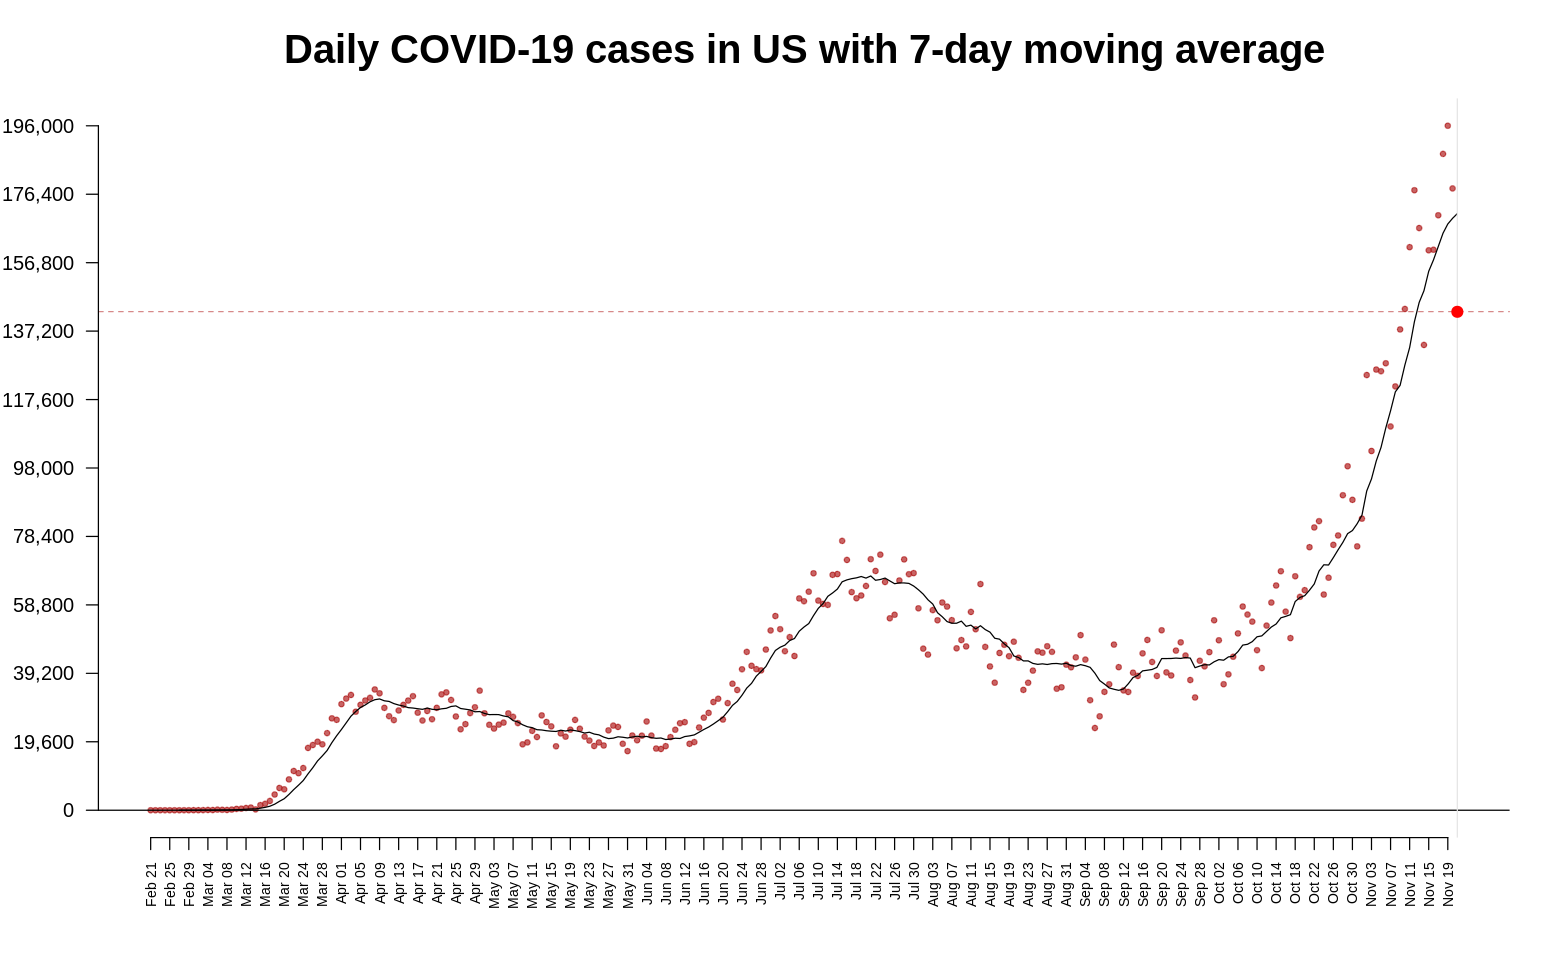

In [17]:
first.der <- diff(ccw$US, lag = 1, differences = 1)


k=7
MAV <- rollmean(first.der,k)


plot(ccw$date[2:length(ccw$date)-1], first.der, 
     pch = 19, cex = .6,
     ylab='', 
     xlab='',
     main ='Daily COVID-19 cases in US with 7-day moving average',
     col=alpha("firebrick",.7),
     axes=FALSE,
     cex.main=2)


lines(ccw$date[8:length(ccw$date)-1], MAV[1:length(MAV)])
abline(h=0)
abline(v=ccw$date[length(ccw$date)-1], col='gray90')
abline(h=first.der[length(ccw$date)-1], col='firebrick', lty=2, lwd=.5)
points(ccw$date[length(ccw$date)-1], last(first.der), main="US covid-19", pch=19, cex=1.2, col='red')
at1 <- seq(min(ccw$date), max(ccw$date), by=4)
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
at2 <- seq(min(first.der),max(first.der)+5000,by=round(0.1*max(first.der)))
axis(side=2, at2, 
     las=2, cex.axis=1, labels = formatC(at2, big.mark = ",", format = "d"))

popUSA = 328000000
paste("The case rate per 100,000 people in the US is ", round(last(MAV)/3280),".")


Call:
lm(formula = first.der ~ poly(day, 8, raw = TRUE), data = ccw[-1, 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-43675  -4587    135   4789  32552 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.296e+04  5.595e+03   4.104 5.41e-05 ***
poly(day, 8, raw = TRUE)1 -5.999e+03  8.828e+02  -6.795 7.07e-11 ***
poly(day, 8, raw = TRUE)2  3.913e+02  4.567e+01   8.567 8.75e-16 ***
poly(day, 8, raw = TRUE)3 -9.636e+00  1.089e+00  -8.851  < 2e-16 ***
poly(day, 8, raw = TRUE)4  1.184e-01  1.387e-02   8.532 1.11e-15 ***
poly(day, 8, raw = TRUE)5 -7.946e-04  1.004e-04  -7.911 6.89e-14 ***
poly(day, 8, raw = TRUE)6  2.964e-06  4.140e-07   7.159 7.95e-12 ***
poly(day, 8, raw = TRUE)7 -5.771e-09  9.043e-10  -6.382 7.75e-10 ***
poly(day, 8, raw = TRUE)8  4.582e-12  8.116e-13   5.645 4.23e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8285 on 266 degrees of freedom
Multip

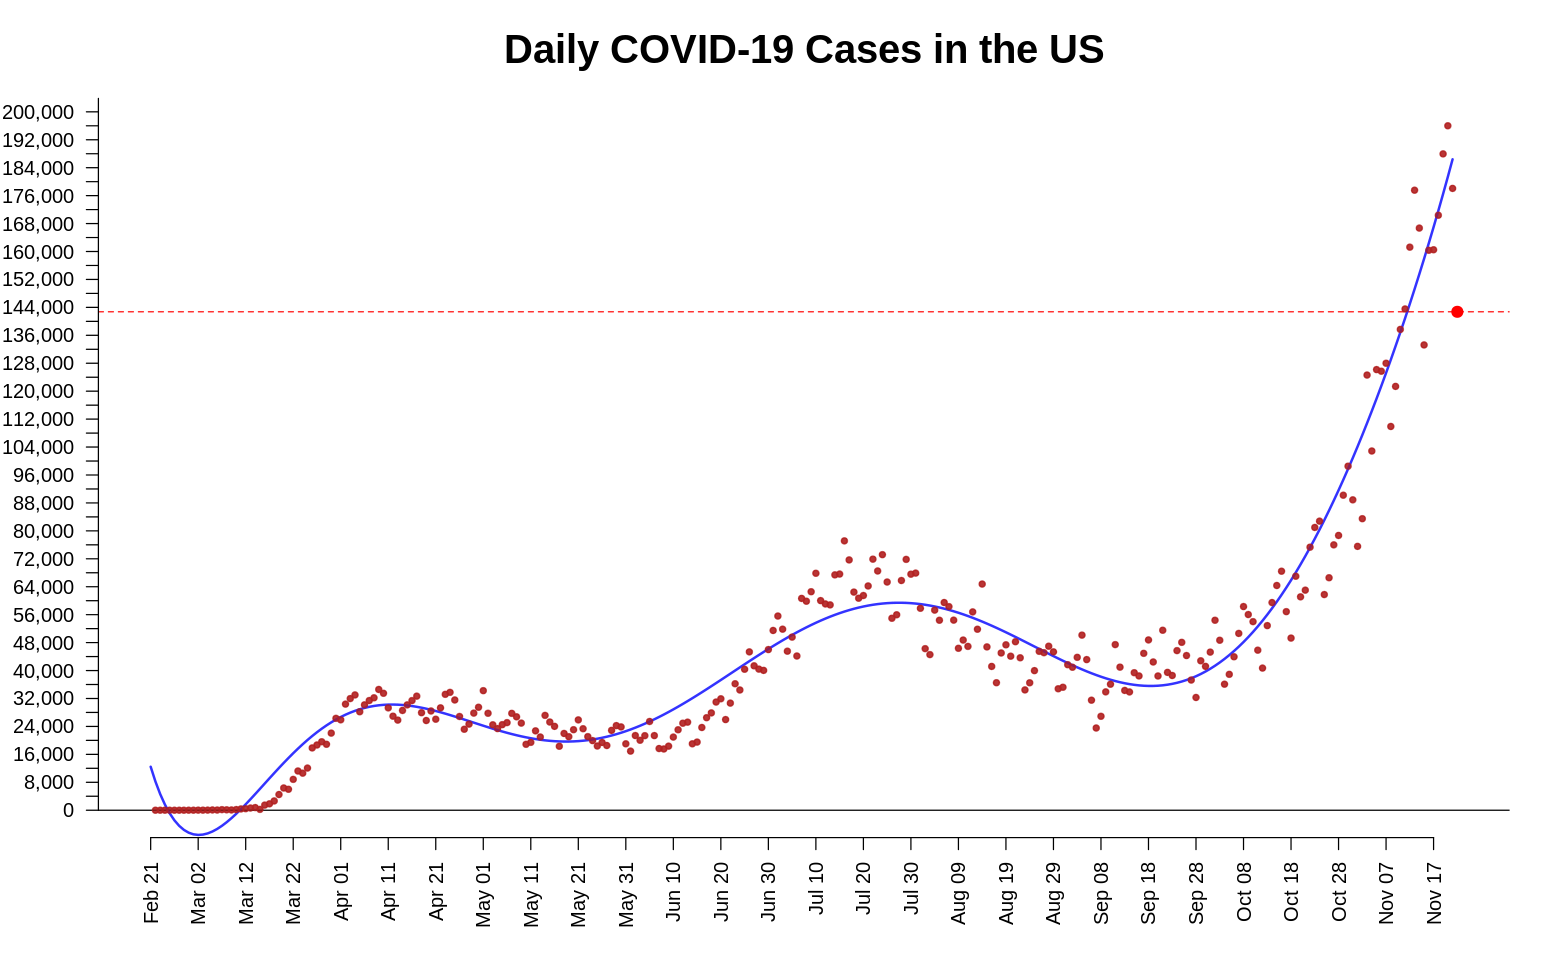

In [18]:
ccw$first.der <- c(NA, diff(ccw$US))  ## better add an NA and integrate in data frame
ccw$day <- seq_along(ccw$date)


fit8 <- lm(first.der ~ poly(day, 8, raw=TRUE), ccw[-1, ]) 

with(ccw, plot(day, first.der, 
      main="Daily COVID-19 Cases in the US", cex.main=2,
      axes=FALSE,
      xlab='', 
      ylab='',
      las = 2,
      col=alpha('firebrick',.7), pch = 19, cex = .6))

abline(h=0)
abline(h=ccw$first.der[length(ccw$day)], col='red', lty=2)

tck <- seq(min(ccw$day), max(ccw$day), by=10)
axis(1, tck, labels=FALSE)

at2 <- seq(min(first.der),max(first.der)+150000,4000)
axis(side=2, at2, 
     las=2, cex.axis=1, labels = formatC(at2, big.mark = ",", format = "d"))

mtext(strftime(ccw$date[tck], "%b %d"), 1, 1, at=tck, las=2)

lines(fit8$fitted.values, col=alpha('blue',.8), lwd=2)
points(ccw$day, ccw$first.der, main="US covid-19", pch=19, cex=.7, col=alpha('firebrick',.7))
points(tail(ccw$day,1), last(ccw$first.der), main="US covid-19", pch=19, cex=1.2, col='red')
summary(fit8)

$$\text{first deriv} \sim \text{Intercept} + \text{day} + \text{day}^2 + \text{day}^3 + \text{day}^4 + \text{day}^5 + \text{day}^6 + \text{day}^7 + \text{day}^8 $$


Time difference of 88 days

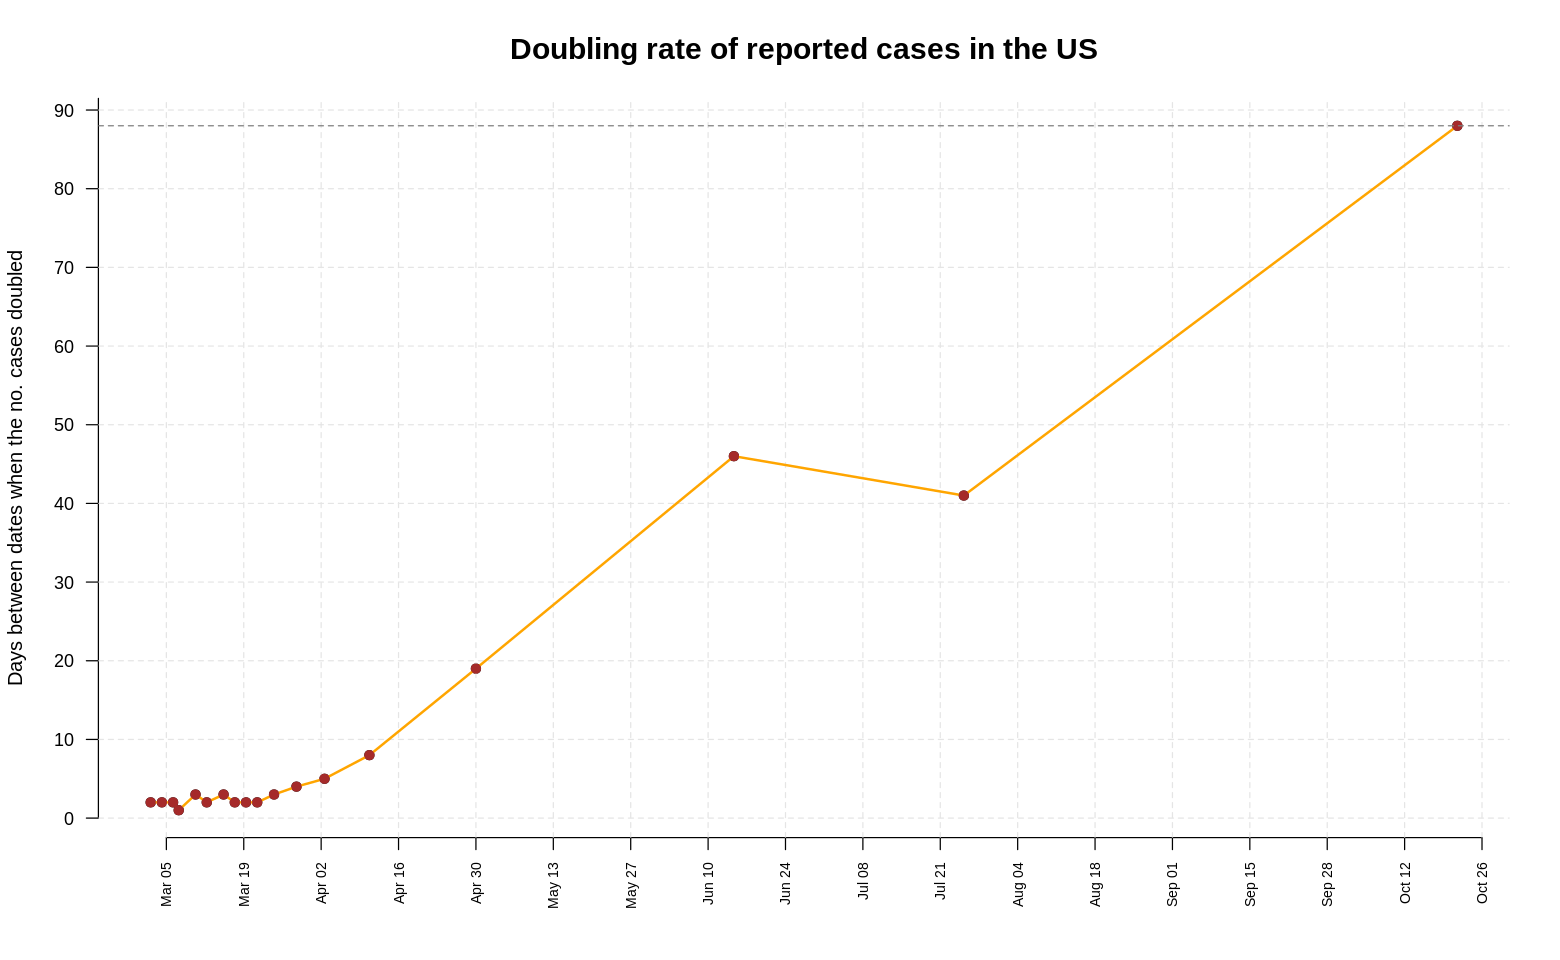

In [19]:
# Doubling time in the number of cases in the US:

v <- numeric(0)
for (i in 1:length(2^seq(3,floor(log2(max(ccw$US)))))){
  v[i] <- min(which(ccw$US >= 2^seq(3,floor(log2(max(ccw$US))))[i]))
}

x2dates <- ccw[unique(v),]


doubling_times <- c(diff.Date(x2dates$date)[1],diff.Date(x2dates$date))
x2dates <- cbind(x2dates,doubling_times)
x2dates <- x2dates[3:nrow(x2dates),]
plot(x2dates$date, x2dates$doubling_times, 
     pch=19,
     xlab='',
     ylab='Days between dates when the no. cases doubled',
     axes=F,
     cex.axis=0.9,
     las=2,
     main = "Doubling rate of reported cases in the US",
     cex.main=1.5,
     bty='l')

at1 <- seq(min(ccw$date), max(ccw$date)+5, by=0.05*length(ccw$date))
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)


at2 <- seq(0, 300, by=10);
axis(side=2, at2, cex.axis=0.9, las=2)
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines


lines(x2dates$date, x2dates$doubling_times, lwd=2, col="orange")
points(x2dates$date, x2dates$doubling_times, pch=19, col="brown")
abline(h=tail(x2dates$doubling_times,1), lty=2, col='gray50')

max(x2dates$doubling_times)

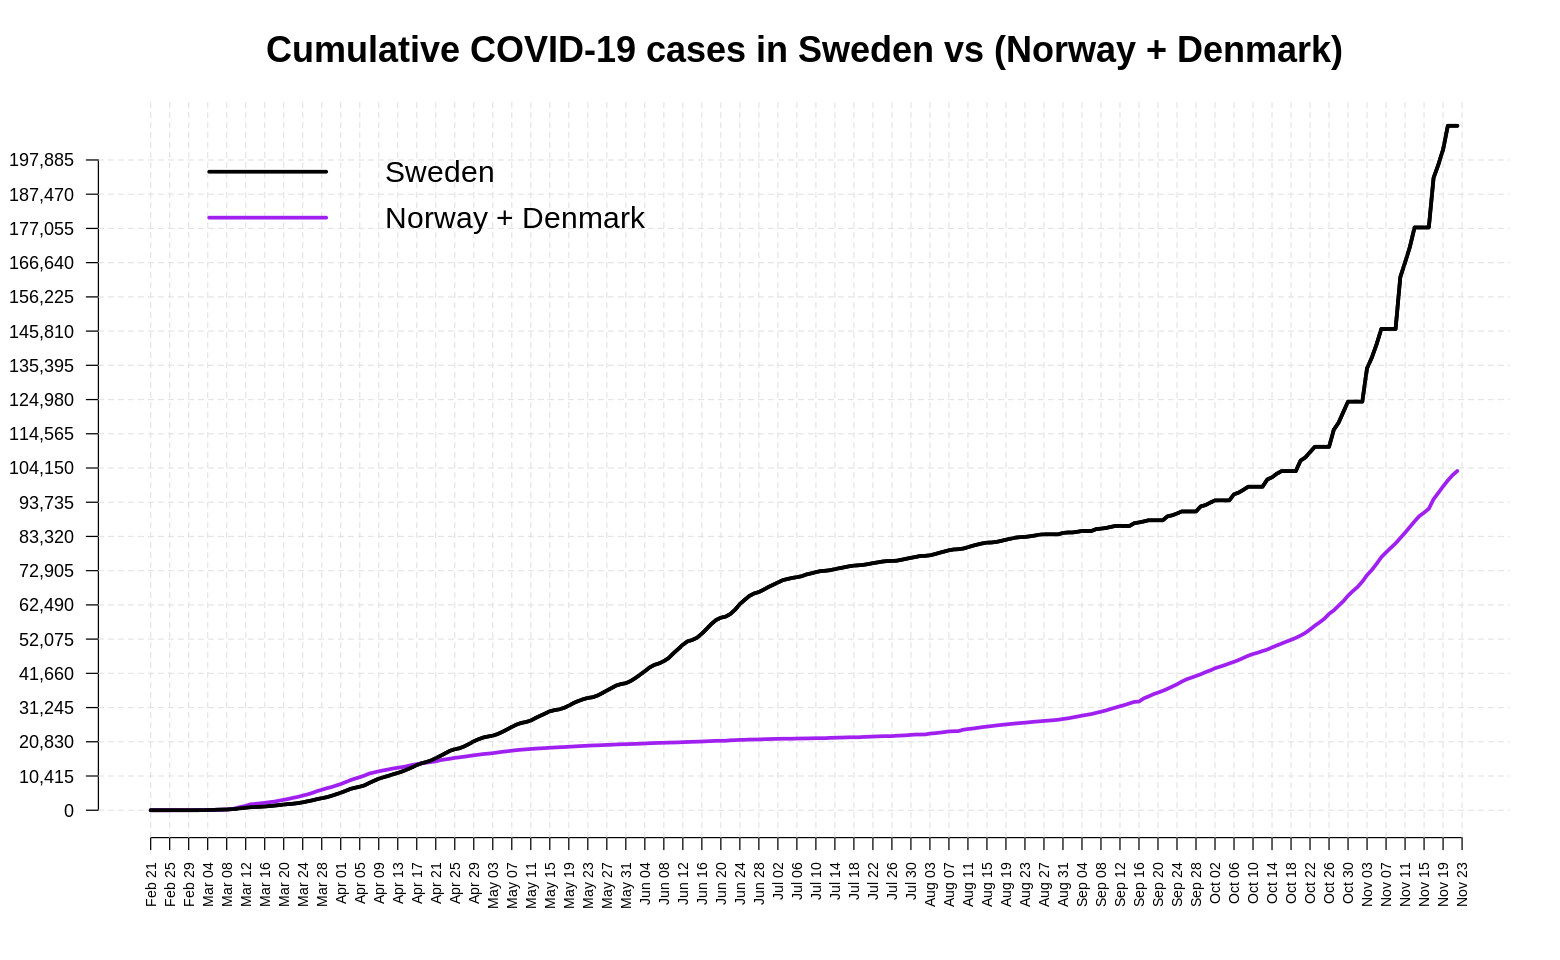

In [20]:
# Comparison in the number of cases in Sweden versus Norway + Denmark:

plot(ccw$date, ccw$Sweden, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     col=1,
     axes=F,
     cex.axis=0.7,
     las=2,
     main = "Cumulative COVID-19 cases in Sweden vs (Norway + Denmark)",
     cex.main=1.8,
     bty='l')

at1 <- seq(min(ccw$date), max(ccw$date)+1, by=4)
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

at2 <- seq(0, max(ccw$Sweden), by=round(.05  * max(ccw$Sweden)))
axis(side=2, at2, 
     las=2, cex.axis=.9, labels = formatC(at2, big.mark = ",", format = "d"))

abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines

lines(ccw$date, ccw$Norway + ccw$Denmark, lwd=3, col='purple')
lines(ccw$date, ccw$Sweden, lwd=3)

legend(ccw$date[1], max(ccw$Sweden), bg="transparent",
       legend=c("Sweden","Norway + Denmark"),
       col=c(1,'purple'), lty=c(1,1), lwd=3, cex=1.5,
       box.lty=0)


[1] "Total cases in Philadelphia:  59,081"

[1] "Total cases in Middlesex:  28,190"

[1] "Total cases in Monmouth:  18,716"

[1] "Total cases in Ocean:  20,154"

[1] "Total cases in Camden:  16,918"

[1] "Total cases in Burlington:  12,037 out of 445,349 or  2.7  percent."

[1] "Total cases in Bucks:  15,126"

[1] "Total cases in Atlantic:  7,270"

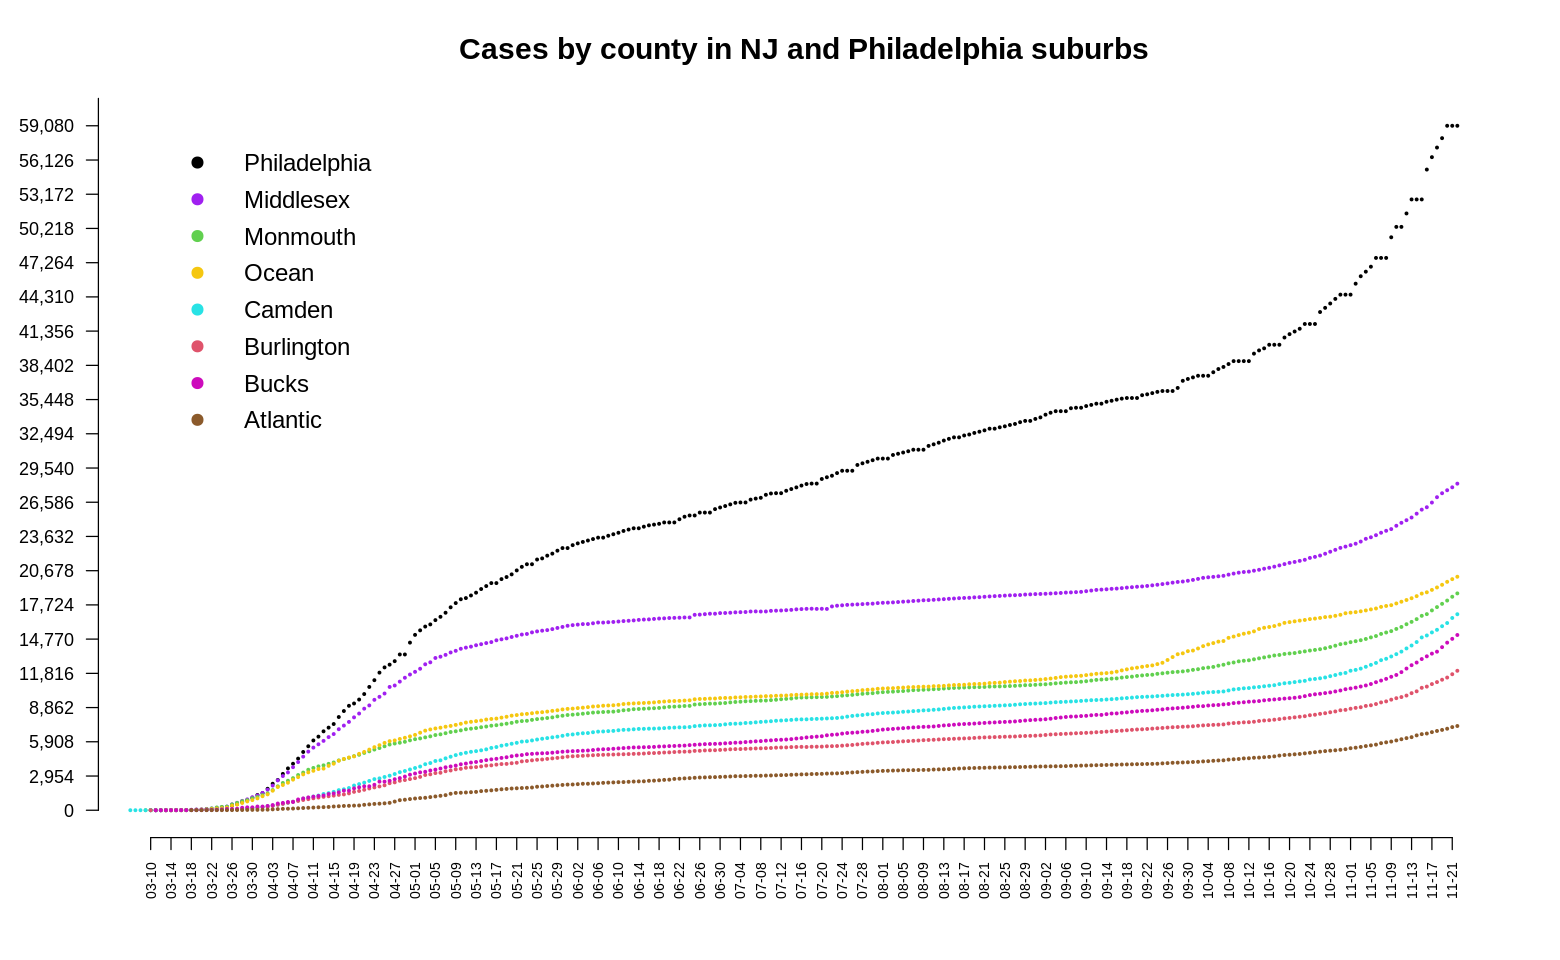

In [21]:
# Cases by county in NJ and Philadelphia suburbs:

states = read.csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", sep =",",header = T)
states <- states %>%
  mutate(date = as.POSIXct(date, format = '%Y-%m-%d'))

counties = read.csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", sep =",",header = T)
counties <- counties %>%
  mutate(date = as.POSIXct(date, format = '%Y-%m-%d'))


Burlington <- counties[counties$state=="New Jersey" & counties$county=="Burlington",]
Burlington <- droplevels(Burlington)
rownames(Burlington) <- NULL

Ocean <- counties[counties$state=="New Jersey" & counties$county=="Ocean",]
Ocean <- droplevels(Ocean)
rownames(Ocean) <- NULL

Atlantic <- counties[counties$state=="New Jersey" & counties$county=="Atlantic",]
Atlantic <- droplevels(Atlantic)
rownames(Atlantic) <- NULL

Camden <- counties[counties$state=="New Jersey" & counties$county=="Camden",]
Camden <- droplevels(Camden)
rownames(Camden) <- NULL

Monmouth <- counties[counties$state=="New Jersey" & counties$county=="Monmouth",]
Monmouth <- droplevels(Monmouth)
rownames(Monmouth) <- NULL

Middlesex <- counties[counties$state=="New Jersey" & counties$county=="Middlesex",]
Middlesex <- droplevels(Middlesex)
rownames(Middlesex) <- NULL

Philadelphia <- counties[counties$state=="Pennsylvania" & counties$county=="Philadelphia",]
Philadelphia <- droplevels(Philadelphia)
rownames(Philadelphia) <- NULL

Bucks <- counties[counties$state=="Pennsylvania" & counties$county=="Bucks",]
Bucks <- droplevels(Bucks)
rownames(Bucks) <- NULL

with(as.data.frame(Philadelphia),
     plot(date,cases,axes=FALSE, xlab="", ylab="", pch=19, cex.axis=0.8, cex=0.3,
          cex.main=1.5, las=2, bty='l',
          main="Cases by county in NJ and Philadelphia suburbs"))

ats <- seq(trunc(min(Philadelphia$date), "days"), trunc(max(Philadelphia$date), "days"), by="4 days")
axis.POSIXct(1, ats, at=ats, 
             labels=format(ats,"%m-%d"),
             las=2, cex.axis=0.7)

at2 <- seq(0, 500000, by=round(.05 * max(Philadelphia$cases)))
axis(side=2, at2, 
     las=2, cex.axis=.9, labels = formatC(at2, big.mark = ",", format = "d"))

points(Middlesex$date, Middlesex$cases, pch=19, col="purple", cex=0.3)
points(Monmouth$date, Monmouth$cases, pch=19, col=3, cex=0.3)
points(Ocean$date, Ocean$cases, pch=19, col=7, cex=0.3)
points(Camden$date, Camden$cases, pch=19, col=5, cex=0.3)
points(Burlington$date, Burlington$cases, pch=19, col=2, cex=0.3)
points(Bucks$date, Bucks$cases, pch=19, col=6, cex=0.3)
points(Atlantic$date, Atlantic$cases, pch=19, col="tan4", cex=0.3)


legend(Philadelphia$date[1], max(Philadelphia$cases), bg="transparent",
       legend=c("Philadelphia", "Middlesex", "Monmouth", "Ocean", 
                "Camden", "Burlington", "Bucks", "Atlantic"),
       col=c(1, "purple",3, 7,5, 2, 6, "tan4"), 
       pch=19, cex=1.2, box.lty=0)    



paste("Total cases in Philadelphia: ", formatC(tail(Philadelphia$cases,1),format="d",big.mark=","))
paste("Total cases in Middlesex: ", formatC(tail(Middlesex$cases,1),format="d",big.mark=","))
paste("Total cases in Monmouth: ", formatC(tail(Monmouth$cases,1),format="d",big.mark=","))
paste("Total cases in Ocean: ", formatC(tail(Ocean$cases,1),format="d",big.mark=","))
paste("Total cases in Camden: ", format(tail(Camden$cases,1),format="d",big.mark=","))
paste("Total cases in Burlington: ", format(tail(Burlington$cases,1),format="d",big.mark=","), "out of 445,349 or ", 
        round(tail(Burlington$cases,1)*100/445349,2), " percent.")
paste("Total cases in Bucks: ", formatC(tail(Bucks$cases,1),format="d",big.mark=","))
paste("Total cases in Atlantic: ", format(tail(Atlantic$cases,1),format="d",big.mark=","))

[1] "Total cases in NJ:  307,819"

[1] "Total cases in NY:  600,967"

[1] "Total cases in PA:  313,788"

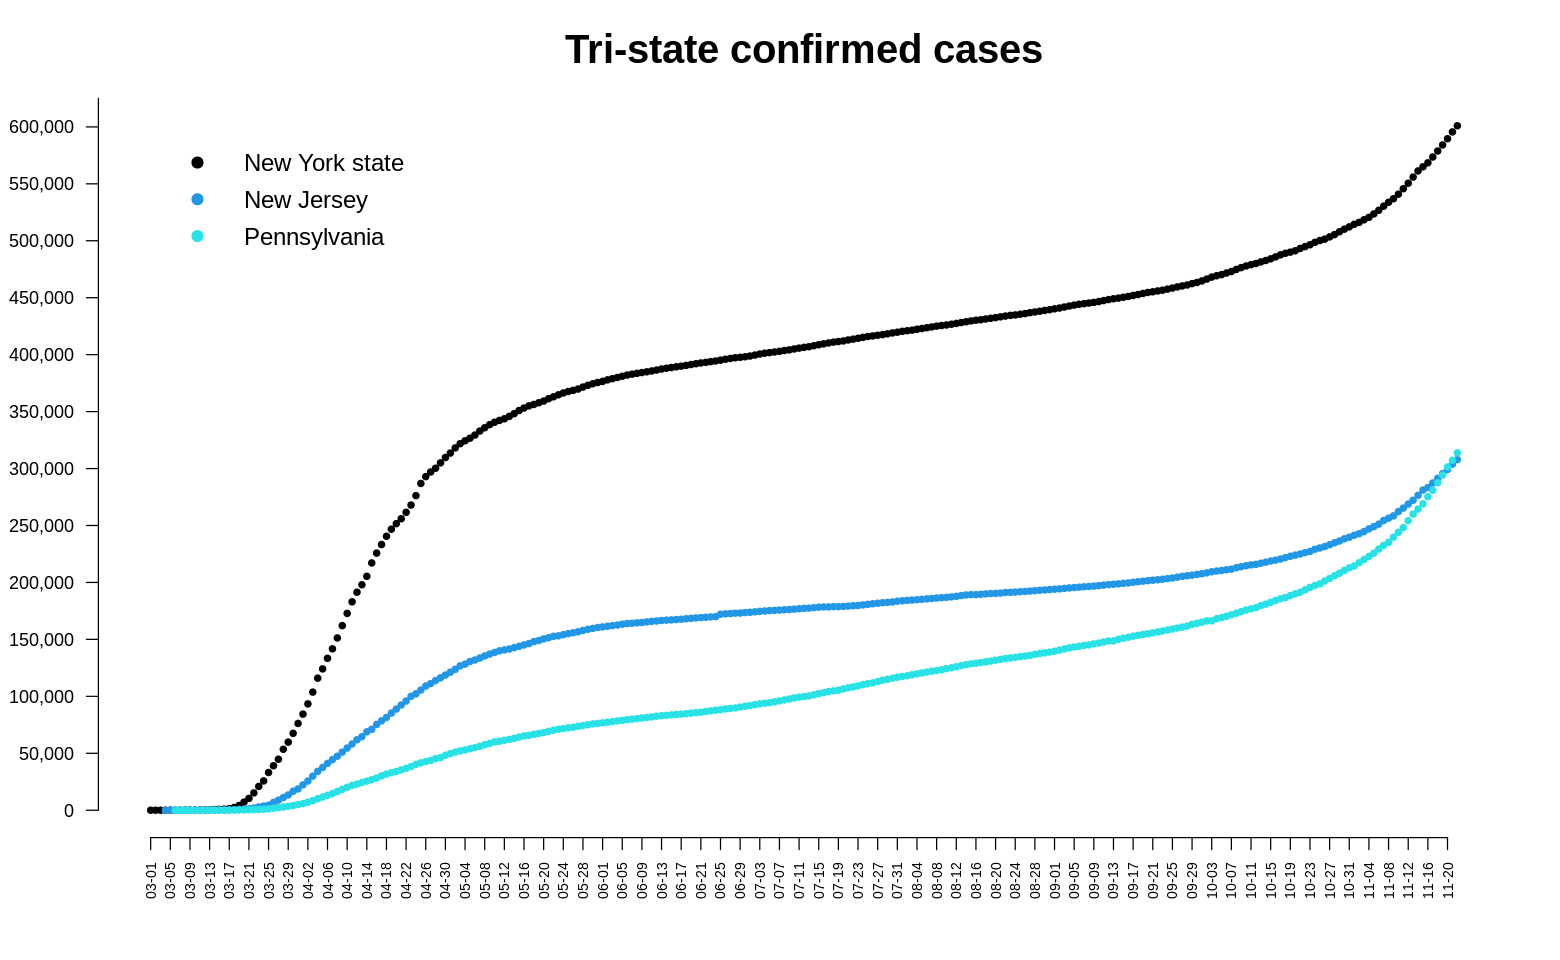

In [22]:
# Tri-state cases (NY, NJ, PA):

NJ <- states[states$state=="New Jersey",]
NJ <- droplevels(NJ)
rownames(NJ) <- NULL

NY <- states[states$state=="New York",]
NY <- droplevels(NY)
rownames(NY) <- NULL

PA <- states[states$state=="Pennsylvania",]
PA <- droplevels(PA)
rownames(PA) <- NULL

with(as.data.frame(NY),
     plot(date,cases,axes=FALSE, xlab="", ylab="", pch=19, 
          cex.axis=0.6, cex=0.7,
          cex.main=2, las=2, bty='l',
          main="Tri-state confirmed cases"))

ats <- seq(trunc(min(NY$date), "days"), trunc(max(NY$date), "days"), by="4 days")

axis.POSIXct(1,ats, ats,
             labels=format(ats,"%m-%d"),
             las=2, cex.axis=0.7)

at2 <- seq(0, 1000000, by=50000);
axis(side=2, at2, 
     las=2, cex.axis=.9, labels = formatC(at2, big.mark = ",", format = "d"))

points(NJ$date, NJ$cases, pch=19, col=4, cex=0.7)
points(PA$date, PA$cases, pch=19, col=5, cex=0.7)

legend(NY$date[1], max(NY$cases), bg="transparent",
       legend=c("New York state", "New Jersey", "Pennsylvania"),
       col=c(1, 4, 5), pch=19, cex=1.2, box.lty=0)

paste("Total cases in NJ: ", formatC(tail(NJ$cases,1),format="d",big.mark=","))
paste("Total cases in NY: ", formatC(tail(NY$cases,1),format="d",big.mark=","))
paste("Total cases in PA: ", formatC(tail(PA$cases,1),format="d",big.mark=","))

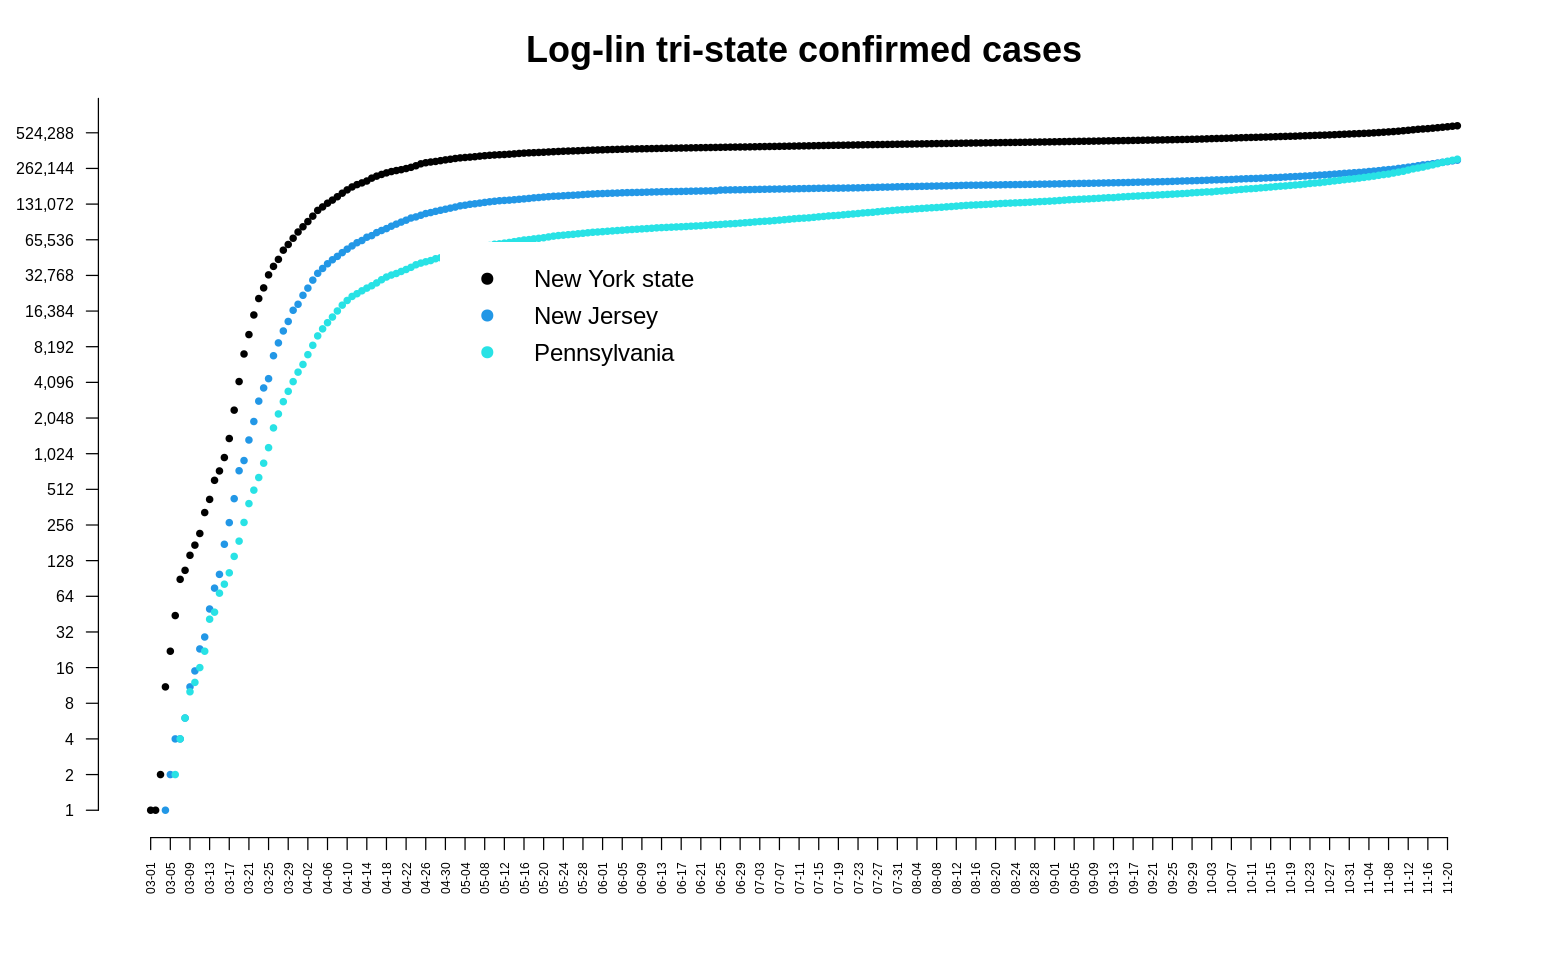

In [23]:
# Log-linear plot of cases in NY, NJ, PA:

with(as.data.frame(NY),
     plot(date,cases,axes=FALSE, xlab="", ylab="", pch=19, cex.axis=0.8, cex=0.7,
          cex.main=1.8, las=2, bty='l', log='y',
          main="Log-lin tri-state confirmed cases"))

ats <- seq(trunc(min(NY$date), "days"), trunc(max(NY$date), "days"), by="4 days")
axis.POSIXct(1,ats, ats,
             labels=format(ats,"%m-%d"),
             las=2, cex.axis=0.6)

at2 <- 2^seq(0,30,by=1)
axis(side=2, at2, cex.axis=0.8, las=2, labels = formatC(at2, big.mark = ",", format = "d"))

points(NJ$date, NJ$cases, pch=19, col=4, cex=0.7)
points(PA$date, PA$cases, pch=19, col=5, cex=0.7)


legend(NY$date[60], 0.2*max(PA$cases),
       legend=c("New York state", "New Jersey", "Pennsylvania"),
       col=c(1, 4, 5), pch=19, cex=1.2, box.lty=0)

[1] "New cases in NJ:  3968"

[1] "New cases in PA:  6541"

[1] "New cases in NY:  5386"

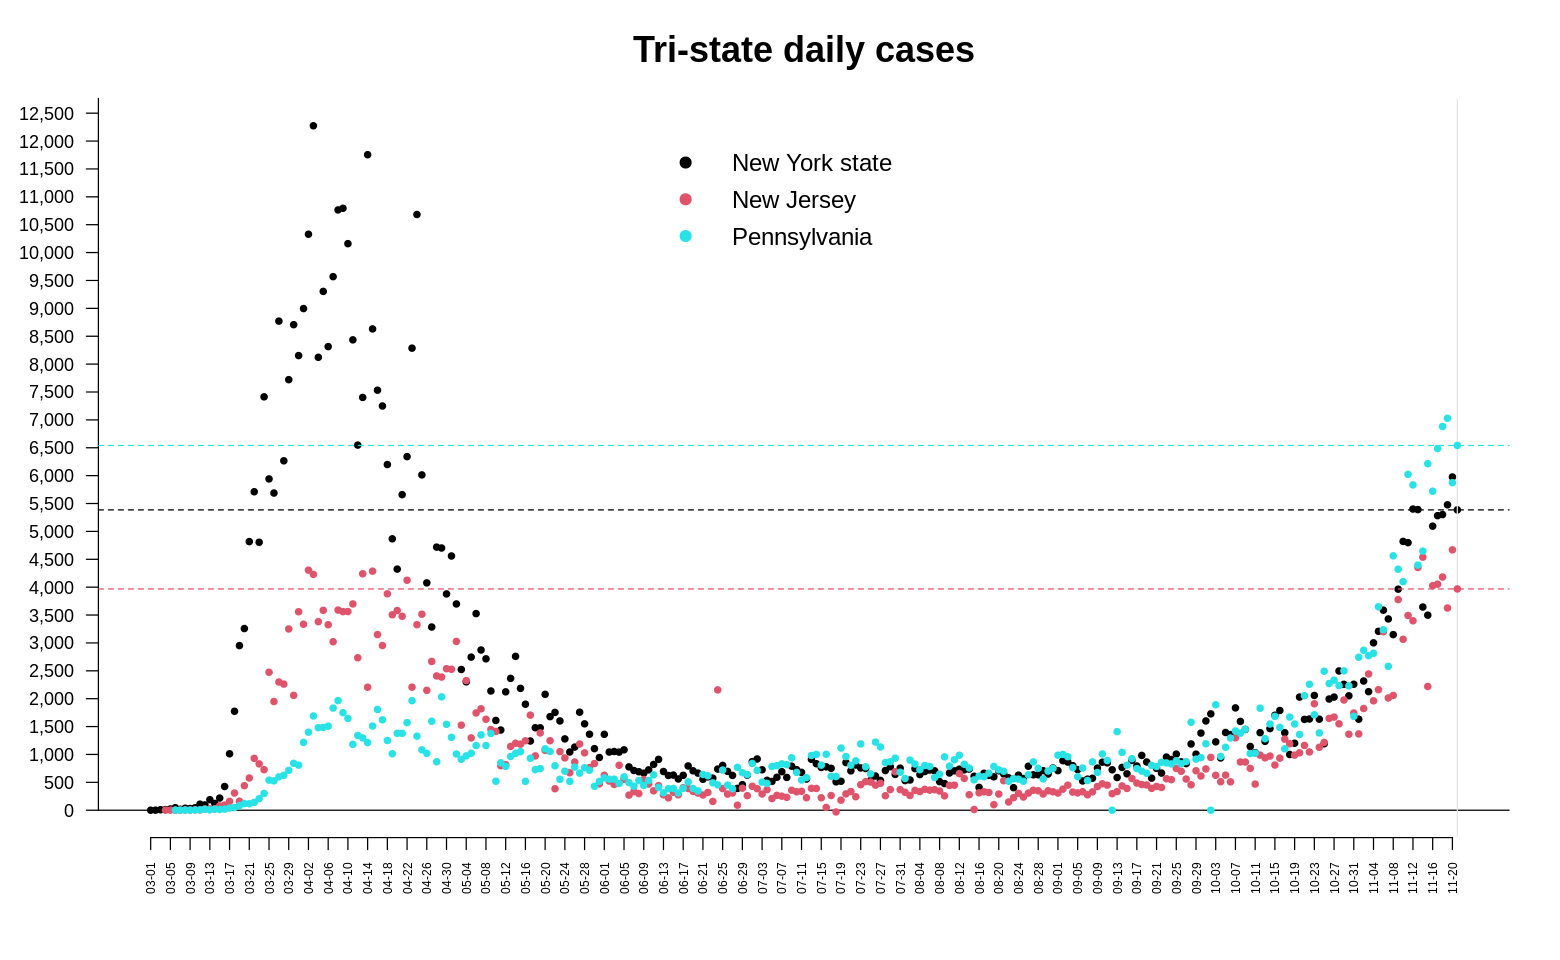

In [24]:
first.diff.NY <- diff(NY$cases, lag = 1, differences = 1)

with(as.data.frame(NY),
     plot(NY$date[2:length(NY$date)-1], first.diff.NY, 
          axes=F, 
          xlab="", ylab="", pch=19, 
          cex.axis=1.2, cex=0.7,
          cex.main=1.8, las=2, bty='l',
          main="Tri-state daily cases"))

ats <- seq(trunc(min(NY$date), "days"), trunc(max(NY$date), "days"), by="4 days")
axis.POSIXct(1,ats, ats,
             labels=format(ats,"%m-%d"),
             las=2, cex.axis=0.6)

at2 <- seq(0, 1000000, by=500);
axis(side=2, at2, 
     las=2, cex.axis=.9, labels = formatC(at2, big.mark = ",", format = "d"))

abline(h=0)
abline(v=NY$date[length(NY$date)-1], col='gray90')
abline(h=first.diff.NY[length(NY$date)-1], lty= 2, col=1)

first.diff.NJ <- diff(NJ$cases, lag = 1, differences = 1)
first.diff.PA <- diff(PA$cases, lag = 1, differences = 1)

points(NJ$date[2:length(NJ$date)-1], first.diff.NJ, pch=19, col=2, cex=0.7)
abline(h=first.diff.NJ[length(NJ$date)-1], lty=2, col=2)
points(PA$date[2:length(PA$date)-1], first.diff.PA, pch=19, col=5, cex=0.7)
abline(h=first.diff.PA[length(PA$date)-1], lty=2, col=5)



legend(NY$date[100], max(first.diff.NY), bg="transparent",
       legend=c("New York state", "New Jersey", "Pennsylvania"),
       col=c(1, 2, 5), pch=19, cex=1.2, box.lty=0)

paste("New cases in NJ: ", tail(first.diff.NJ,1))
paste("New cases in PA: ", tail(first.diff.PA,1))
paste("New cases in NY: ", tail(first.diff.NY,1))

In [25]:
state_pop = read.csv("https://raw.githubusercontent.com/RInterested/DATASETS/905bfd4cdb09f0131be368e4e9d63eef7f44abf2/state_population.csv", sep =",",header = T)
colnames(state_pop)[which(colnames(state_pop)=="NAME")] <- "state"

last_day <- states[states$date==states$date[nrow(states)],]
last_day <- last_day[last_day$state %in% intersect(last_day$state, state_pop$state),]

last_day <- merge(last_day, state_pop[, c("state", "POPESTIMATE2019")], by="state")
colnames(last_day)[which(colnames(last_day)=="POPESTIMATE2019")] <- "pop"

last_day$perhead <- round(last_day$cases / last_day$pop * 10^5)

[1] "NJ is the  13  state with most COVID cases."

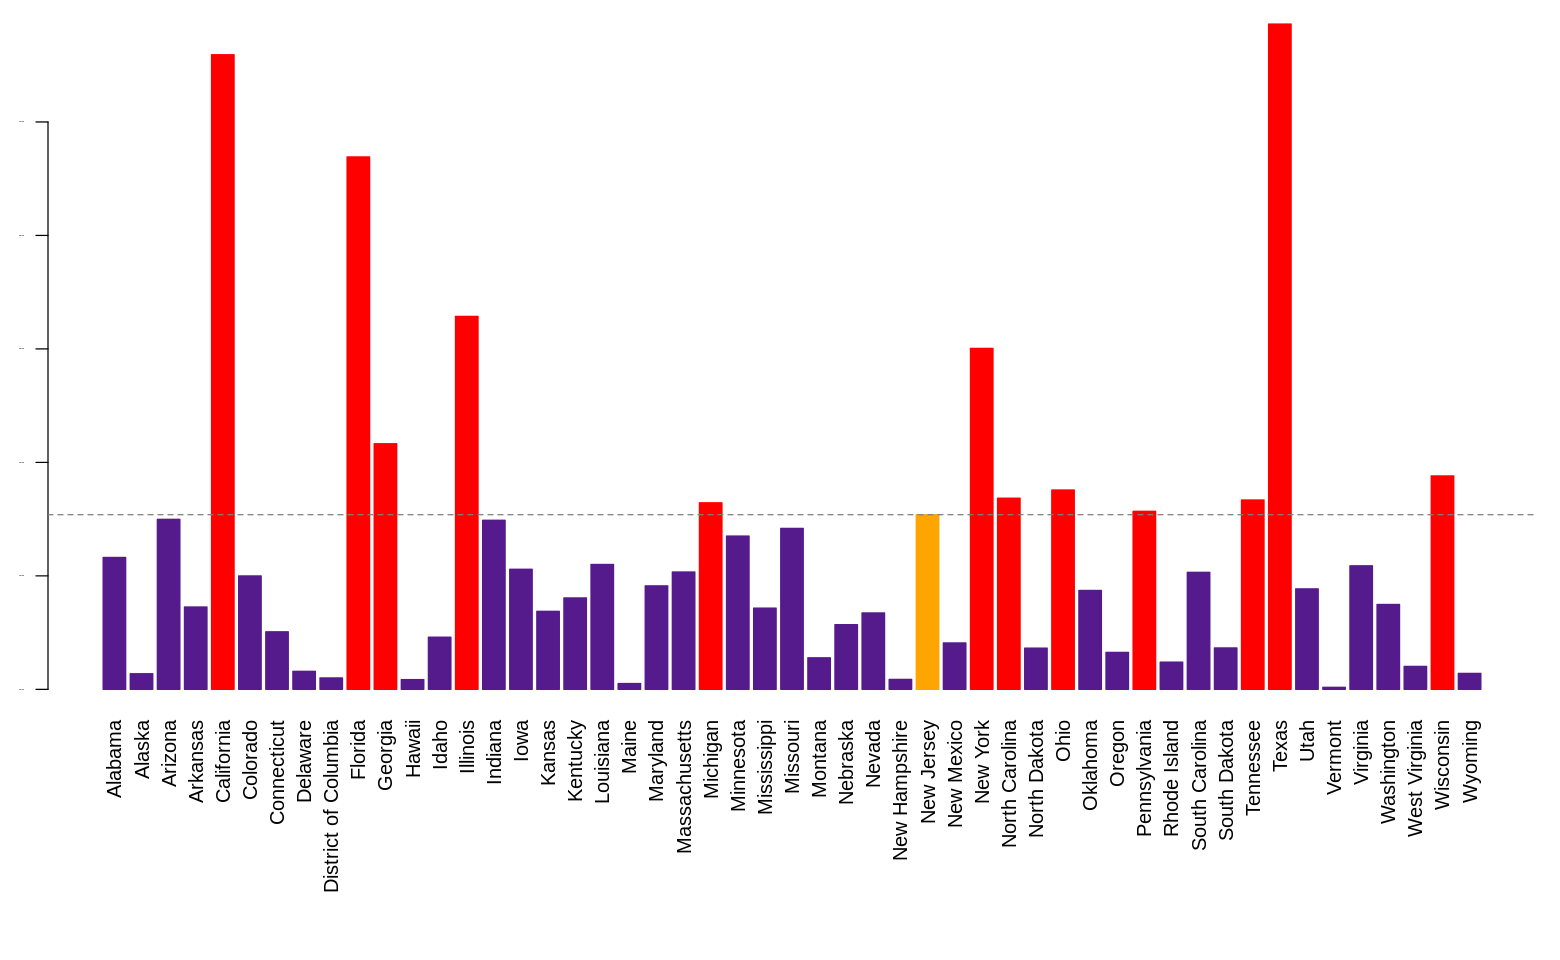

In [26]:
bad <-last_day$state[last_day$cases > last_day$cases[which(last_day$state=='New Jersey')]]
paste("NJ is the ", length(bad) + 1, " state with most COVID cases.")

par(mar=c(11,2,1,1))
barplot(with(last_day, 
              tapply(cases, state, FUN = sum)),las=2, cex.axis=.1, 
              col=ifelse(last_day$state=='New Jersey',"orange",
                  ifelse(last_day$state %in% bad, "red", "purple4")), 
              border=ifelse(last_day$state=='New Jersey', "orange",
                  ifelse(last_day$state %in% bad, "red", "purple4")))
abline(h = last_day$cases[which(last_day$state=='New Jersey')], lty=2, col='grey50')

[1] "NJ is the 32 state with most COVID cases per capita."

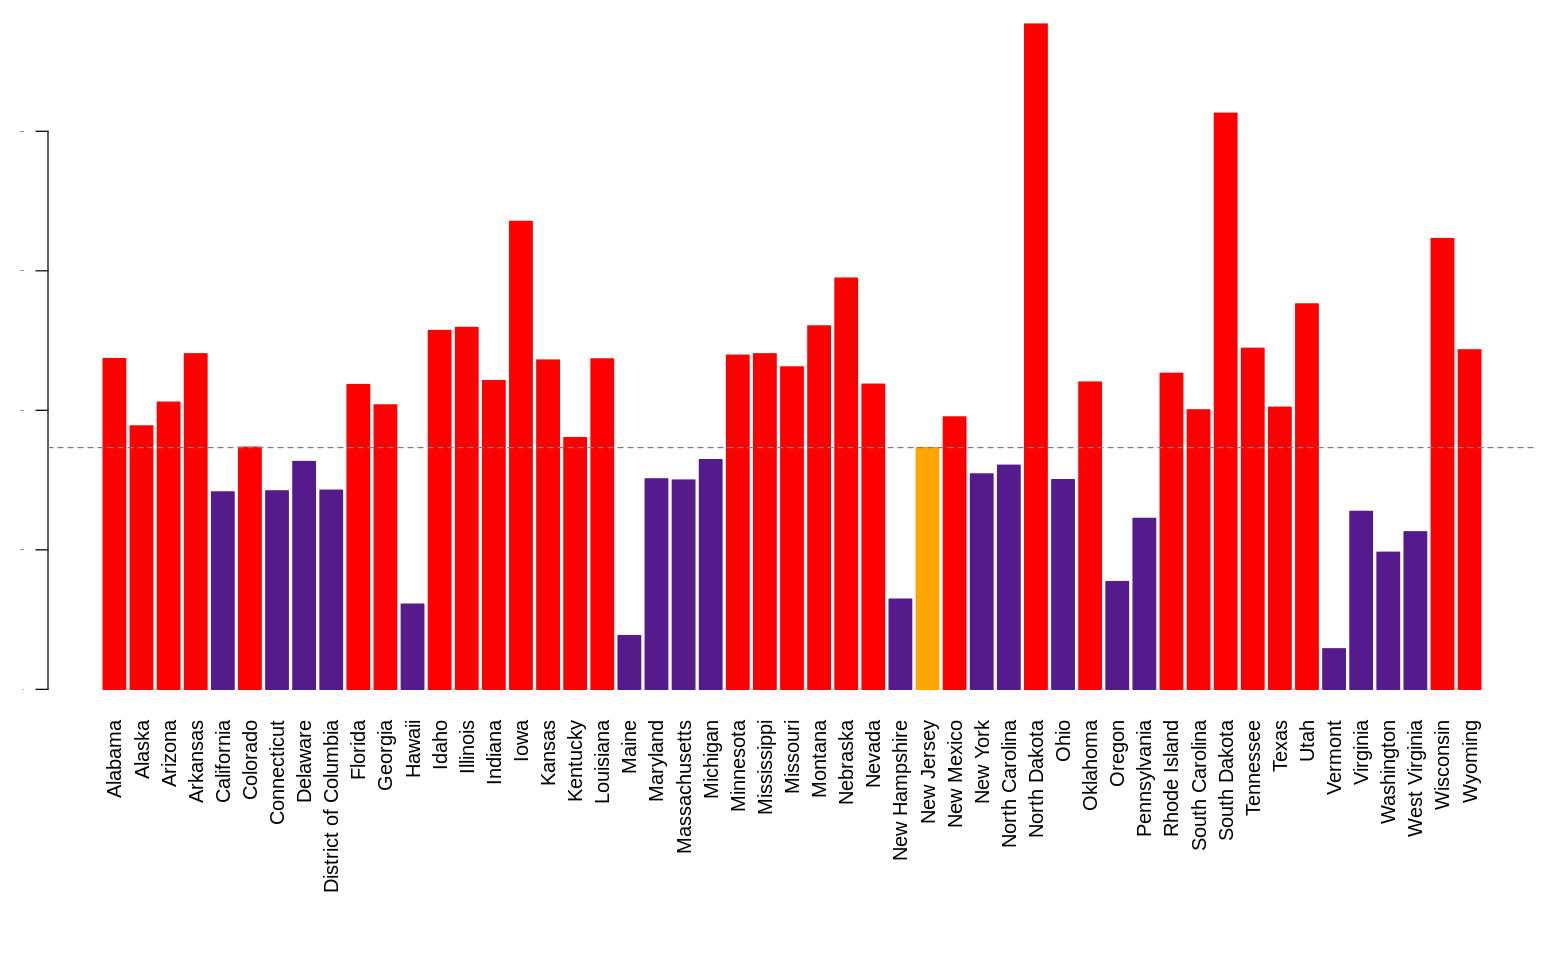

In [27]:
badpercapita <-last_day$state[last_day$perhead > last_day$perhead[which(last_day$state=='New Jersey')]]
paste("NJ is the", length(badpercapita) + 1, "state with most COVID cases per capita.")


par(mar=c(11,2,1,1))
barplot(with(last_day, 
              tapply(perhead, state, FUN = sum)),las=2, cex.axis=.1, 
              col=ifelse(last_day$state=='New Jersey',"orange",
                  ifelse(last_day$state %in% badpercapita, "red", "purple4")), 
              border=ifelse(last_day$state=='New Jersey',"orange", ifelse(last_day$state %in% badpercapita, "red", "purple4")))
abline(h = last_day$perhead[which(last_day$state=='New Jersey')], lty=2, col='grey50')

[1] "New cases in Philadelphia prior:  0" "in the last day:  0"

[1] "New cases in Burlington prior:  288" "in the last day:  297"

[1] "New cases in Middlesex prior:  253" "in the last day:  316"

[1] "The case rate per 100,000 in Burlington county is 47 ."

[1] "The case rate per 100,000 in NJ is 43 ."

[1] "The case rate per 100,000 in Philadelphia is 16 ."

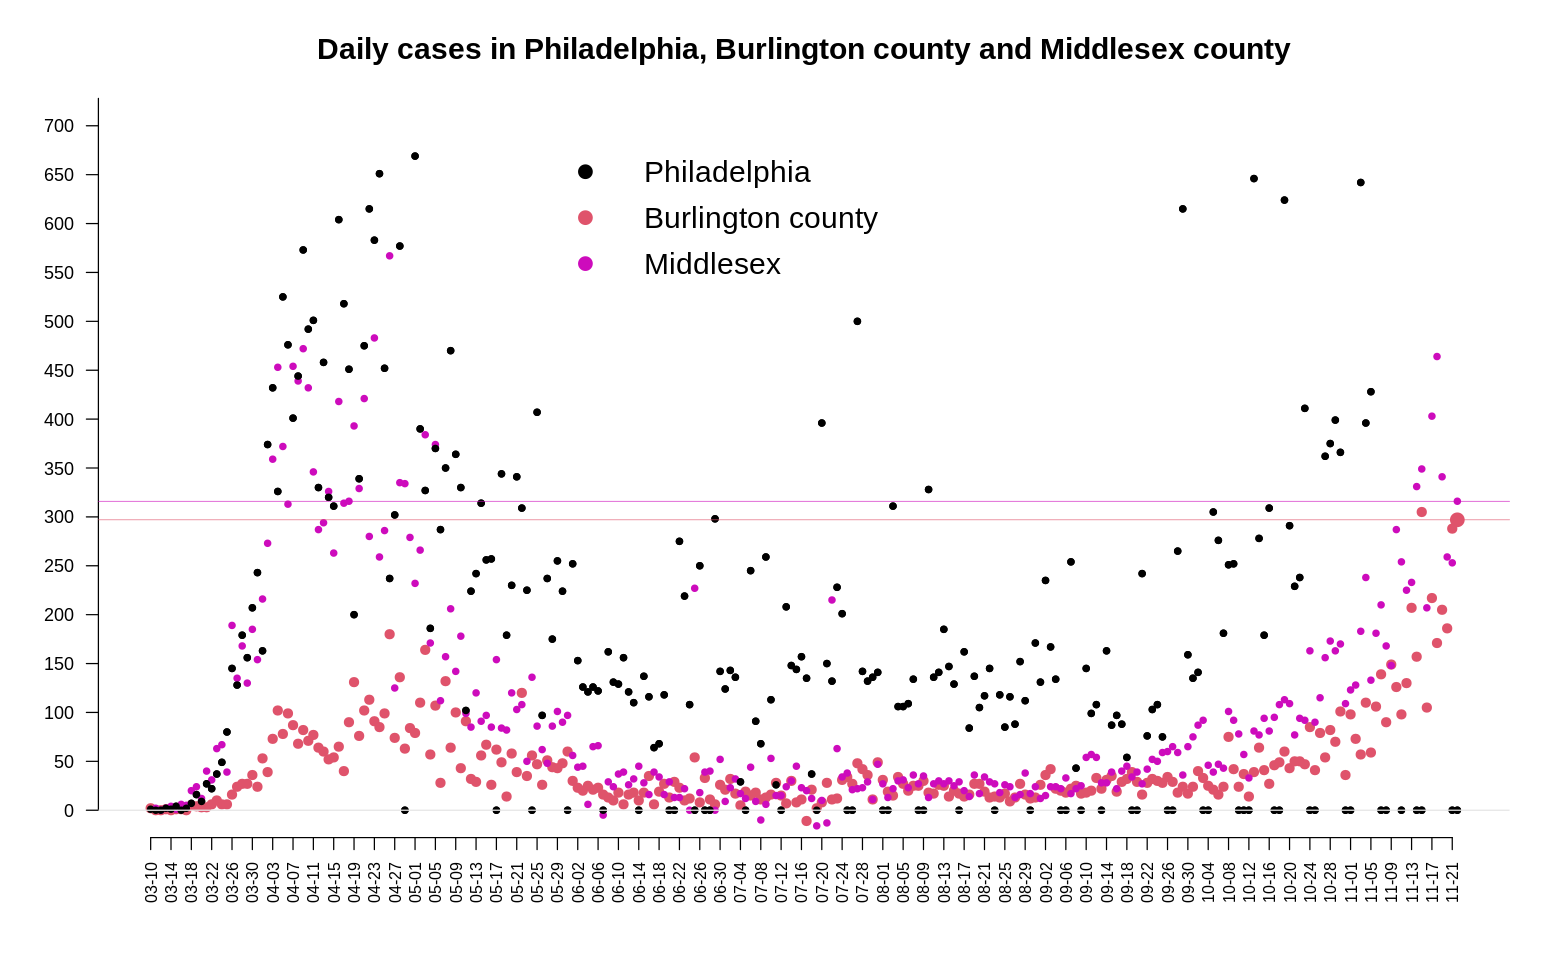

In [28]:
# Daily cases in Philadelphia, Burlington county and Middlesex county:

Philadelphia$daily <- c(Philadelphia$cases[1], diff(Philadelphia$cases,1))
with(as.data.frame(Philadelphia),
     plot(date,daily,
          axes=F, xlab="", ylab="", pch=19, 
          cex.axis=0.8, cex=0.7,
          cex.main=1.5, las=2, bty='l', ylim=c(0,700),
          main="Daily cases in Philadelphia, Burlington county and Middlesex county"))

ats <- seq(trunc(min(Philadelphia$date), "days"), trunc(max(Philadelphia$date), "days"), by="4 days")
axis.POSIXct(1,ats, at=ats,
             labels=format(ats,"%m-%d"),
             las=2, cex.axis=0.8)

at2 <- seq(0, 10000, by=50);
axis(side=2, at2, 
     las=2, cex.axis=.9, labels = formatC(at2, big.mark = ",", format = "d"))


Burlington$daily <- c(Burlington$cases[1], diff(Burlington$cases,1))
points(Burlington$date, Burlington$daily, pch=19, col=2, cex=1)
points(last(Burlington$date), last(Burlington$daily), pch=19, col=2, cex=1.5)
Middlesex$daily <- c(Middlesex$cases[1], diff(Middlesex$cases,1))
points(Middlesex$date, Middlesex$daily, pch=19, col=6, cex=0.7)
points(Philadelphia$date, Philadelphia$daily, pch=19, col=1, cex=0.7)
at1 <- seq(min(Philadelphia$date), last(Philadelphia$date)+1, by="days")
  

legend(Philadelphia$date[75], 700, bg="transparent",
       legend=c("Philadelphia", "Burlington county", "Middlesex"),
       col=c(1, 2, 6), cex=1.5,
       pch=c(19,19,19), box.lty=0)

abline(h = tail(Philadelphia$daily,1), col='gray90')
abline(h = tail(Burlington$daily,1), col='2', lwd=.5)
abline(h = tail(Middlesex$daily,1), col='6', lwd=.5)

paste(c("New cases in Philadelphia prior: ", "in the last day: "), tail(Philadelphia$daily,2))
paste(c("New cases in Burlington prior: ", "in the last day: "), tail(Burlington$daily,2))
paste(c("New cases in Middlesex prior: ", "in the last day: "), tail(Middlesex$daily,2))

paste("The case rate per 100,000 in Burlington county is", round((sum(tail(Burlington$daily,7)) / 7) / 445349 * 10^5), ".")
paste("The case rate per 100,000 in NJ is", round((sum(tail(first.diff.NJ,7))/7)/last_day$pop[which(last_day$state=='New Jersey')] *10^5), ".")
paste("The case rate per 100,000 in Philadelphia is", round((sum(tail(Philadelphia$daily,7)) / 7) / 5700000 * 10^5), ".")

###NOTES ON THE R NAUGHT $R_o$ FACTOR:

$R_0$ assumes  that there are no counter-measures curtail the spread of the virus. It is more relevant to calculate $R_e(t)$: the time-changing effective reproduction factor, measuring, on a given day $t$, how many people does one person infect.



In the SIR model we have three fractions of the population:

$S$ - fraction susceptible to be infected

$I$ - fraction of infected

$R$ - fraction of recovered or dead.

$$S \underset{-\beta SI}\longrightarrow I \underset{\gamma I} \longrightarrow R$$

where $\beta$ is $\frac{\text{average # contacts}}{\text{person }\times\text{ time}}$ and $\gamma$ is $\frac{1}{\text{average time a person is infectious}}.$ 

The three governing equations are:

$$\begin{align}
\dot S &= -\beta IS\\
\dot I &= \beta IS - \gamma I\\
\dot R &= \gamma I
\end{align}$$

Working a bit on the second equation we get

$$\begin{align}
\dot I\rvert_{t=0} &= \beta  I_0 S_0 - \gamma I_0
\end{align}$$

and if $\beta S_0 - \gamma >0$ we will have exponential growth. Equivalently, the condition can be expressed as

$$\frac{\beta}{\gamma} S_0 >1 \implies R_0 > 1$$

with $R_o =\frac{\beta}{\gamma} S_0.$


Over time this value evolves. [Here](https://rt.live/) are the values by state of the $R_t.$

